In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tqdm

sns.set(color_codes=True)

import py_auc

sg = py_auc.Score_generator()

In [8]:
# total number 
n_list = [1000, 10000, 1000000]

# rho number
rho_list = [0.25, 0.5, 0.75]

# mu number
mu0_list = [0]
mu1_list = [1, 2, 3, 4, 6]
std0_list = [1, 2]
std1_list = [1, 2]
#dist_list = [[1, 0, 1, 1], [1, 0, 2, 2], [2, 0, 1, 1], [2, 0, 2, 2], 
#             [3, 0, 1, 1], [3, 0, 2, 2], [4, 0, 1, 1], [4, 0, 2, 2],
#             [5, 0, 1, 1], [5, 0, 2, 2], [6, 0, 1, 1], [6, 0, 2, 2]]
#dist_list = [[1, 0, 2, 2], [2, 0, 2, 2], 
#             [3, 0, 2, 2], [4, 0, 2, 2],
#             [5, 0, 2, 2], [6, 0, 2, 2]]
dist_list = [[1, 0, 2, 2], [3, 0, 2, 2], [5, 0, 2, 2]]

# shape 
#shape_list = ['gaussian', 'triangle', 'uniform']
shape_list = ['gaussian']
#shapen_list = [0, 1, 2]
shapen_list = [0]

# sampling
sampling_ratio_list = [0.1, 0.2, 0.3, 0.5, 0.7]
#sampling_repeat_list = [100, 200, 300, 400, 500]
sampling_repeat_list = [100, 300, 500]

# repeat number
repeat_list = [0, 1, 2, 3, 4]

In [9]:
# data frame for simulation summary

colnames = ['n', 'n1', 'shape1', 'mu1', 'std1', 'n0', 'shape0', 'mu0', 'std0', 'rho', 
            'auc_delta', 'auc_delta_time', 'auc_bac', 'auc_bac_time', 'auc_sk', 'auc_sk_time', 
            'aupr_pre', 'aupr_pre_time', 'aupr_sk', 'aupr_sk_time', 
            'sampling_size', 'sampling_repeats', 'sampling_ratio', 'auc_delta_sample', 
            'auc_bac_sample', 'auc_bac_sample_time', 'aupr_pre_sample', 'aupr_pre_sample_time', 
            'repeat#', 'done']

data = np.zeros((50000, len(colnames)))
i = 0

for n in n_list:
    for rho in rho_list:
        for shape in shapen_list:
            for dist in dist_list:
                for sampling_ratio in sampling_ratio_list:
                    for sampling_repeat in sampling_repeat_list:
                        for repeat in repeat_list:
                            data[i, :] = np.array([n, int(n*rho), shape, dist[0], dist[2], n-int(n*rho), shape,
                                                   dist[1], dist[3], rho, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                                                   int(n*sampling_ratio), sampling_repeat, sampling_ratio, 
                                                   0, 0, 0, 0, 0, repeat, 0])
                            i = i+1
                            
summary = pd.DataFrame(data[:i], columns=colnames)
print('Total #: {}'.format(i))

for i in shapen_list:
    summary.loc[summary['shape0'] == i, 'shape0'] = shape_list[i]
    summary.loc[summary['shape1'] == i, 'shape1'] = shape_list[i]
    
summary = summary.astype({'n':'int', 'n1':'int', 'n0':'int', 'sampling_size':'int', 
                          'sampling_repeats':'int', 'done':'int'})

Total #: 2025


In [10]:
summary.head()

,n,n1,shape1,mu1,std1,n0,shape0,mu0,std0,rho,...,sampling_size,sampling_repeats,sampling_ratio,auc_delta_sample,auc_bac_sample,auc_bac_sample_time,aupr_pre_sample,aupr_pre_sample_time,repeat#,done
0,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.0,0.0,0.0,0.0,0.0,1.0,0
2,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.0,0.0,0.0,0.0,0.0,2.0,0
3,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.0,0.0,0.0,0.0,0.0,3.0,0
4,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.0,0.0,0.0,0.0,0.0,4.0,0


In [11]:
def run_one_simulation(summary, s_i):
    """ run simulation on condition s_i """
    sg.set0(summary['shape0'][s_i], summary['mu0'][s_i], summary['std0'][s_i], summary['n0'][s_i])
    sg.set1(summary['shape1'][s_i], summary['mu1'][s_i], summary['std1'][s_i], summary['n1'][s_i])
    
    sg.plot(filename='hist-{}{}-{}{}-n{}-r{}.pdf'.format(summary['shape0'][s_i], summary['mu0'][s_i], 
                                                            summary['shape1'][s_i], summary['mu1'][s_i],
                                                            summary['n'][s_i], summary['rho'][s_i]), show=False)

    res, ctime = sg.get_classProbability(sampleSize = summary['sampling_size'][s_i], 
                                         sampleN = summary['sampling_repeats'][s_i], measure_time=True)
    fig = plt.figure(figsize=(12,5))
    sg.plot_prob(filename='prob-summary-{}.pdf'.format(s_i), show=False, sample=res, fig=fig)
    
    summary.at[s_i, 'auc_delta_sample'] = sg._auc
    summary.at[s_i, 'auc_bac_sample'] = sg._aucbac
    summary.at[s_i, 'aupr_pre_sample'] = sg._auprc
    summary.at[s_i, 'auc_bac_sample_time'] = ctime
    
    a = py_auc.AUC(sg.get_asDataFrame())
    auc, ctime = a.cal_auc_rank(measure_time=True)
    summary.at[s_i, 'auc_delta'] = auc
    summary.at[s_i, 'auc_delta_time'] = ctime

    auc, ctime = a.cal_auc_bac(measure_time=True)
    summary.at[s_i, 'auc_bac'] = auc
    summary.at[s_i, 'auc_bac_time'] = ctime
    
    auc, ctime = a.cal_auc_sklearn(measure_time=True)
    summary.at[s_i, 'auc_sk'] = auc
    summary.at[s_i, 'auc_sk_time'] = ctime
    
    aupr, ctime = a.cal_auprc_rank(measure_time=True)
    summary.at[s_i, 'aupr_pre'] = aupr
    summary.at[s_i, 'aupr_pre_time'] = ctime
    
    aupr, ctime = a.cal_auprc_sklearn(measure_time=True)
    summary.at[s_i, 'aupr_sk'] = aupr
    summary.at[s_i, 'aupr_sk_time'] = ctime

In [ ]:
data_fname = 'Sim_summary_data_v2.csv'
summary.to_csv(data_fname)

run_number = 2025
summary = pd.read_csv(data_fname, index_col=0)

s_i = 0
for i in tqdm.tqdm(range(run_number)):
    while(summary['done'][s_i] != 0):
        s_i = s_i + 1
    print('#{} - run simulation on condition: {}'.format(i, s_i))
    run_one_simulation(summary, s_i)
    summary.at[s_i, 'done'] = 1    
    summary.to_csv(data_fname)

  0%|          | 0/2025 [00:00<?, ?it/s]

#0 - run simulation on condition: 0


  0%|          | 1/2025 [00:02<1:24:39,  2.51s/it]

#1 - run simulation on condition: 1


  0%|          | 2/2025 [00:04<1:22:06,  2.44s/it]

#2 - run simulation on condition: 2


  0%|          | 3/2025 [00:06<1:19:05,  2.35s/it]

#3 - run simulation on condition: 3


  0%|          | 4/2025 [00:09<1:17:52,  2.31s/it]

#4 - run simulation on condition: 4


  0%|          | 5/2025 [00:11<1:16:28,  2.27s/it]

#5 - run simulation on condition: 5


  0%|          | 6/2025 [00:14<1:24:05,  2.50s/it]

#6 - run simulation on condition: 6


  0%|          | 7/2025 [00:17<1:29:34,  2.66s/it]

#7 - run simulation on condition: 7


  0%|          | 8/2025 [00:20<1:32:38,  2.76s/it]

#8 - run simulation on condition: 8


  0%|          | 9/2025 [00:23<1:35:14,  2.83s/it]

#9 - run simulation on condition: 9


  0%|          | 10/2025 [00:26<1:38:57,  2.95s/it]

#10 - run simulation on condition: 10


  1%|          | 11/2025 [00:30<1:45:56,  3.16s/it]

#11 - run simulation on condition: 11


  1%|          | 12/2025 [00:33<1:50:50,  3.30s/it]

#12 - run simulation on condition: 12


  1%|          | 13/2025 [00:37<1:54:04,  3.40s/it]

#13 - run simulation on condition: 13


  1%|          | 14/2025 [00:41<1:56:02,  3.46s/it]

#14 - run simulation on condition: 14


  1%|          | 15/2025 [00:45<2:01:19,  3.62s/it]

#15 - run simulation on condition: 15


  1%|          | 16/2025 [00:47<1:46:40,  3.19s/it]

#16 - run simulation on condition: 16


  1%|          | 17/2025 [00:49<1:36:56,  2.90s/it]

#17 - run simulation on condition: 17


  1%|          | 18/2025 [00:51<1:30:00,  2.69s/it]

#18 - run simulation on condition: 18


  1%|          | 19/2025 [00:54<1:27:32,  2.62s/it]

#19 - run simulation on condition: 19


  1%|          | 20/2025 [00:56<1:22:51,  2.48s/it]

#20 - run simulation on condition: 20


  1%|          | 21/2025 [00:59<1:26:31,  2.59s/it]

#21 - run simulation on condition: 21


  1%|          | 22/2025 [01:02<1:29:15,  2.67s/it]

#22 - run simulation on condition: 22


  1%|          | 23/2025 [01:04<1:30:28,  2.71s/it]

#23 - run simulation on condition: 23


  1%|          | 24/2025 [01:07<1:31:41,  2.75s/it]

#24 - run simulation on condition: 24


  1%|          | 25/2025 [01:10<1:35:45,  2.87s/it]

#25 - run simulation on condition: 25


  1%|▏         | 26/2025 [01:14<1:43:12,  3.10s/it]

#26 - run simulation on condition: 26


  1%|▏         | 27/2025 [01:18<1:50:07,  3.31s/it]

#27 - run simulation on condition: 27


  1%|▏         | 28/2025 [01:21<1:53:58,  3.42s/it]

#28 - run simulation on condition: 28


  1%|▏         | 29/2025 [01:25<1:58:14,  3.55s/it]

#29 - run simulation on condition: 29


  1%|▏         | 30/2025 [01:29<1:59:55,  3.61s/it]

#30 - run simulation on condition: 30


  2%|▏         | 31/2025 [01:31<1:45:44,  3.18s/it]

#31 - run simulation on condition: 31


  2%|▏         | 32/2025 [01:34<1:37:56,  2.95s/it]

#32 - run simulation on condition: 32


  2%|▏         | 33/2025 [01:36<1:30:32,  2.73s/it]

#33 - run simulation on condition: 33


  2%|▏         | 34/2025 [01:38<1:25:19,  2.57s/it]

#34 - run simulation on condition: 34


  2%|▏         | 35/2025 [01:40<1:20:25,  2.42s/it]

#35 - run simulation on condition: 35


  2%|▏         | 36/2025 [01:43<1:25:18,  2.57s/it]

#36 - run simulation on condition: 36


  2%|▏         | 37/2025 [01:46<1:28:28,  2.67s/it]

#37 - run simulation on condition: 37


  2%|▏         | 38/2025 [01:49<1:31:39,  2.77s/it]

#38 - run simulation on condition: 38


  2%|▏         | 39/2025 [01:52<1:33:37,  2.83s/it]

#39 - run simulation on condition: 39


  2%|▏         | 40/2025 [01:55<1:33:15,  2.82s/it]

#40 - run simulation on condition: 40


  2%|▏         | 41/2025 [01:59<1:45:08,  3.18s/it]

#41 - run simulation on condition: 41


  2%|▏         | 42/2025 [02:02<1:49:35,  3.32s/it]

#42 - run simulation on condition: 42


  2%|▏         | 43/2025 [02:06<1:52:35,  3.41s/it]

#43 - run simulation on condition: 43


  2%|▏         | 44/2025 [02:10<1:54:47,  3.48s/it]

#44 - run simulation on condition: 44


  2%|▏         | 45/2025 [02:13<1:57:53,  3.57s/it]

#45 - run simulation on condition: 45


  2%|▏         | 46/2025 [02:16<1:43:33,  3.14s/it]

#46 - run simulation on condition: 46


  2%|▏         | 47/2025 [02:18<1:33:56,  2.85s/it]

#47 - run simulation on condition: 47


  2%|▏         | 48/2025 [02:20<1:26:43,  2.63s/it]

#48 - run simulation on condition: 48


  2%|▏         | 49/2025 [02:22<1:22:37,  2.51s/it]

#49 - run simulation on condition: 49


  2%|▏         | 50/2025 [02:24<1:19:26,  2.41s/it]

#50 - run simulation on condition: 50


  3%|▎         | 51/2025 [02:28<1:29:19,  2.72s/it]

#51 - run simulation on condition: 51


  3%|▎         | 52/2025 [02:31<1:31:13,  2.77s/it]

#52 - run simulation on condition: 52


  3%|▎         | 53/2025 [02:34<1:33:11,  2.84s/it]

#53 - run simulation on condition: 53


  3%|▎         | 54/2025 [02:37<1:34:49,  2.89s/it]

#54 - run simulation on condition: 54


  3%|▎         | 55/2025 [02:40<1:35:40,  2.91s/it]

#55 - run simulation on condition: 55


  3%|▎         | 56/2025 [02:43<1:44:32,  3.19s/it]

#56 - run simulation on condition: 56


  3%|▎         | 57/2025 [02:47<1:48:46,  3.32s/it]

#57 - run simulation on condition: 57


  3%|▎         | 58/2025 [02:51<1:51:57,  3.42s/it]

#58 - run simulation on condition: 58


  3%|▎         | 59/2025 [02:54<1:54:23,  3.49s/it]

#59 - run simulation on condition: 59


  3%|▎         | 60/2025 [02:58<1:56:53,  3.57s/it]

#60 - run simulation on condition: 60


  3%|▎         | 61/2025 [03:00<1:42:56,  3.14s/it]

#61 - run simulation on condition: 61


  3%|▎         | 62/2025 [03:02<1:34:12,  2.88s/it]

#62 - run simulation on condition: 62


  3%|▎         | 63/2025 [03:05<1:32:54,  2.84s/it]

#63 - run simulation on condition: 63


  3%|▎         | 64/2025 [03:08<1:27:15,  2.67s/it]

#64 - run simulation on condition: 64


  3%|▎         | 65/2025 [03:10<1:22:31,  2.53s/it]

#65 - run simulation on condition: 65


  3%|▎         | 66/2025 [03:13<1:26:15,  2.64s/it]

#66 - run simulation on condition: 66


  3%|▎         | 67/2025 [03:16<1:31:02,  2.79s/it]

#67 - run simulation on condition: 67


  3%|▎         | 68/2025 [03:19<1:33:01,  2.85s/it]

#68 - run simulation on condition: 68


  3%|▎         | 69/2025 [03:22<1:34:55,  2.91s/it]

#69 - run simulation on condition: 69


  3%|▎         | 70/2025 [03:25<1:35:29,  2.93s/it]

#70 - run simulation on condition: 70


  4%|▎         | 71/2025 [03:29<1:44:24,  3.21s/it]

#71 - run simulation on condition: 71


  4%|▎         | 72/2025 [03:32<1:50:15,  3.39s/it]

#72 - run simulation on condition: 72


  4%|▎         | 73/2025 [03:36<1:52:56,  3.47s/it]

#73 - run simulation on condition: 73


  4%|▎         | 74/2025 [03:40<1:55:38,  3.56s/it]

#74 - run simulation on condition: 74


  4%|▎         | 75/2025 [03:44<1:58:44,  3.65s/it]

#75 - run simulation on condition: 75


  4%|▍         | 76/2025 [03:46<1:44:10,  3.21s/it]

#76 - run simulation on condition: 76


  4%|▍         | 77/2025 [03:49<1:40:16,  3.09s/it]

#77 - run simulation on condition: 77


  4%|▍         | 78/2025 [03:51<1:30:20,  2.78s/it]

#78 - run simulation on condition: 78


  4%|▍         | 79/2025 [03:53<1:24:06,  2.59s/it]

#79 - run simulation on condition: 79


  4%|▍         | 80/2025 [03:55<1:20:22,  2.48s/it]

#80 - run simulation on condition: 80


  4%|▍         | 81/2025 [03:58<1:25:28,  2.64s/it]

#81 - run simulation on condition: 81


  4%|▍         | 82/2025 [04:01<1:27:12,  2.69s/it]

#82 - run simulation on condition: 82


  4%|▍         | 83/2025 [04:04<1:28:56,  2.75s/it]

#83 - run simulation on condition: 83


  4%|▍         | 84/2025 [04:07<1:30:53,  2.81s/it]

#84 - run simulation on condition: 84


  4%|▍         | 85/2025 [04:10<1:31:14,  2.82s/it]

#85 - run simulation on condition: 85


  4%|▍         | 86/2025 [04:13<1:38:51,  3.06s/it]

#86 - run simulation on condition: 86


  4%|▍         | 87/2025 [04:17<1:44:19,  3.23s/it]

#87 - run simulation on condition: 87


  4%|▍         | 88/2025 [04:21<1:48:23,  3.36s/it]

#88 - run simulation on condition: 88


  4%|▍         | 89/2025 [04:24<1:50:43,  3.43s/it]

#89 - run simulation on condition: 89


  4%|▍         | 90/2025 [04:28<1:51:42,  3.46s/it]

#90 - run simulation on condition: 90


  4%|▍         | 91/2025 [04:30<1:38:28,  3.05s/it]

#91 - run simulation on condition: 91


  5%|▍         | 92/2025 [04:32<1:29:37,  2.78s/it]

#92 - run simulation on condition: 92


  5%|▍         | 93/2025 [04:34<1:23:56,  2.61s/it]

#93 - run simulation on condition: 93


  5%|▍         | 94/2025 [04:37<1:27:51,  2.73s/it]

#94 - run simulation on condition: 94


  5%|▍         | 95/2025 [04:39<1:22:45,  2.57s/it]

#95 - run simulation on condition: 95


  5%|▍         | 96/2025 [04:42<1:24:58,  2.64s/it]

#96 - run simulation on condition: 96


  5%|▍         | 97/2025 [04:45<1:27:34,  2.73s/it]

#97 - run simulation on condition: 97


  5%|▍         | 98/2025 [04:48<1:29:26,  2.79s/it]

#98 - run simulation on condition: 98


  5%|▍         | 99/2025 [04:51<1:29:35,  2.79s/it]

#99 - run simulation on condition: 99


  5%|▍         | 100/2025 [04:54<1:30:28,  2.82s/it]

#100 - run simulation on condition: 100


  5%|▍         | 101/2025 [04:57<1:39:23,  3.10s/it]

#101 - run simulation on condition: 101


  5%|▌         | 102/2025 [05:01<1:44:24,  3.26s/it]

#102 - run simulation on condition: 102


  5%|▌         | 103/2025 [05:05<1:48:01,  3.37s/it]

#103 - run simulation on condition: 103


  5%|▌         | 104/2025 [05:08<1:50:41,  3.46s/it]

#104 - run simulation on condition: 104


  5%|▌         | 105/2025 [05:12<1:52:39,  3.52s/it]

#105 - run simulation on condition: 105


  5%|▌         | 106/2025 [05:14<1:38:53,  3.09s/it]

#106 - run simulation on condition: 106


  5%|▌         | 107/2025 [05:16<1:30:19,  2.83s/it]

#107 - run simulation on condition: 107


  5%|▌         | 108/2025 [05:18<1:22:47,  2.59s/it]

#108 - run simulation on condition: 108


  5%|▌         | 109/2025 [05:21<1:18:52,  2.47s/it]

#109 - run simulation on condition: 109


  5%|▌         | 110/2025 [05:23<1:16:29,  2.40s/it]

#110 - run simulation on condition: 110


  5%|▌         | 111/2025 [05:26<1:22:12,  2.58s/it]

#111 - run simulation on condition: 111


  6%|▌         | 112/2025 [05:29<1:25:31,  2.68s/it]

#112 - run simulation on condition: 112


  6%|▌         | 113/2025 [05:32<1:27:48,  2.76s/it]

#113 - run simulation on condition: 113


  6%|▌         | 114/2025 [05:35<1:28:52,  2.79s/it]

#114 - run simulation on condition: 114


  6%|▌         | 115/2025 [05:38<1:39:45,  3.13s/it]

#115 - run simulation on condition: 115


  6%|▌         | 116/2025 [05:42<1:44:25,  3.28s/it]

#116 - run simulation on condition: 116


  6%|▌         | 117/2025 [05:46<1:49:19,  3.44s/it]

#117 - run simulation on condition: 117


  6%|▌         | 118/2025 [05:50<1:51:41,  3.51s/it]

#118 - run simulation on condition: 118


  6%|▌         | 119/2025 [05:53<1:51:58,  3.53s/it]

#119 - run simulation on condition: 119


  6%|▌         | 120/2025 [05:57<1:52:57,  3.56s/it]

#120 - run simulation on condition: 120


  6%|▌         | 121/2025 [05:59<1:39:55,  3.15s/it]

#121 - run simulation on condition: 121


  6%|▌         | 122/2025 [06:01<1:30:03,  2.84s/it]

#122 - run simulation on condition: 122


  6%|▌         | 123/2025 [06:03<1:23:07,  2.62s/it]

#123 - run simulation on condition: 123


  6%|▌         | 124/2025 [06:05<1:19:00,  2.49s/it]

#124 - run simulation on condition: 124


  6%|▌         | 125/2025 [06:07<1:14:41,  2.36s/it]

#125 - run simulation on condition: 125


  6%|▌         | 126/2025 [06:10<1:20:44,  2.55s/it]

#126 - run simulation on condition: 126


  6%|▋         | 127/2025 [06:13<1:23:18,  2.63s/it]

#127 - run simulation on condition: 127


  6%|▋         | 128/2025 [06:16<1:26:38,  2.74s/it]

#128 - run simulation on condition: 128


  6%|▋         | 129/2025 [06:19<1:27:53,  2.78s/it]

#129 - run simulation on condition: 129


  6%|▋         | 130/2025 [06:22<1:29:19,  2.83s/it]

#130 - run simulation on condition: 130


  6%|▋         | 131/2025 [06:26<1:37:30,  3.09s/it]

#131 - run simulation on condition: 131


  7%|▋         | 132/2025 [06:29<1:42:53,  3.26s/it]

#132 - run simulation on condition: 132


  7%|▋         | 133/2025 [06:33<1:47:19,  3.40s/it]

#133 - run simulation on condition: 133


  7%|▋         | 134/2025 [06:37<1:48:49,  3.45s/it]

#134 - run simulation on condition: 134


  7%|▋         | 135/2025 [06:40<1:51:01,  3.52s/it]

#135 - run simulation on condition: 135


  7%|▋         | 136/2025 [06:43<1:38:11,  3.12s/it]

#136 - run simulation on condition: 136


  7%|▋         | 137/2025 [06:45<1:29:19,  2.84s/it]

#137 - run simulation on condition: 137


  7%|▋         | 138/2025 [06:47<1:23:30,  2.66s/it]

#138 - run simulation on condition: 138


  7%|▋         | 139/2025 [06:49<1:19:02,  2.51s/it]

#139 - run simulation on condition: 139


  7%|▋         | 140/2025 [06:53<1:27:42,  2.79s/it]

#140 - run simulation on condition: 140


  7%|▋         | 141/2025 [06:56<1:30:32,  2.88s/it]

#141 - run simulation on condition: 141


  7%|▋         | 142/2025 [06:59<1:29:47,  2.86s/it]

#142 - run simulation on condition: 142


  7%|▋         | 143/2025 [07:01<1:30:49,  2.90s/it]

#143 - run simulation on condition: 143


  7%|▋         | 144/2025 [07:04<1:31:25,  2.92s/it]

#144 - run simulation on condition: 144


  7%|▋         | 145/2025 [07:07<1:32:27,  2.95s/it]

#145 - run simulation on condition: 145


  7%|▋         | 146/2025 [07:11<1:40:33,  3.21s/it]

#146 - run simulation on condition: 146


  7%|▋         | 147/2025 [07:15<1:46:24,  3.40s/it]

#147 - run simulation on condition: 147


  7%|▋         | 148/2025 [07:19<1:50:34,  3.53s/it]

#148 - run simulation on condition: 148


  7%|▋         | 149/2025 [07:23<1:52:30,  3.60s/it]

#149 - run simulation on condition: 149


  7%|▋         | 150/2025 [07:27<1:54:38,  3.67s/it]

#150 - run simulation on condition: 150


  7%|▋         | 151/2025 [07:29<1:39:38,  3.19s/it]

#151 - run simulation on condition: 151


  8%|▊         | 152/2025 [07:31<1:28:45,  2.84s/it]

#152 - run simulation on condition: 152


  8%|▊         | 153/2025 [07:33<1:21:43,  2.62s/it]

#153 - run simulation on condition: 153


  8%|▊         | 154/2025 [07:35<1:16:32,  2.45s/it]

#154 - run simulation on condition: 154


  8%|▊         | 155/2025 [07:37<1:12:58,  2.34s/it]

#155 - run simulation on condition: 155


  8%|▊         | 156/2025 [07:40<1:18:21,  2.52s/it]

#156 - run simulation on condition: 156


  8%|▊         | 157/2025 [07:43<1:20:49,  2.60s/it]

#157 - run simulation on condition: 157


  8%|▊         | 158/2025 [07:45<1:23:04,  2.67s/it]

#158 - run simulation on condition: 158


  8%|▊         | 159/2025 [07:48<1:24:39,  2.72s/it]

#159 - run simulation on condition: 159


  8%|▊         | 160/2025 [07:51<1:25:36,  2.75s/it]

#160 - run simulation on condition: 160


  8%|▊         | 161/2025 [07:55<1:33:03,  3.00s/it]

#161 - run simulation on condition: 161


  8%|▊         | 162/2025 [07:58<1:38:48,  3.18s/it]

#162 - run simulation on condition: 162


  8%|▊         | 163/2025 [08:02<1:43:03,  3.32s/it]

#163 - run simulation on condition: 163


  8%|▊         | 164/2025 [08:06<1:45:28,  3.40s/it]

#164 - run simulation on condition: 164


  8%|▊         | 165/2025 [08:09<1:47:30,  3.47s/it]

#165 - run simulation on condition: 165


  8%|▊         | 166/2025 [08:11<1:34:36,  3.05s/it]

#166 - run simulation on condition: 166


  8%|▊         | 167/2025 [08:13<1:26:07,  2.78s/it]

#167 - run simulation on condition: 167


  8%|▊         | 168/2025 [08:16<1:19:37,  2.57s/it]

#168 - run simulation on condition: 168


  8%|▊         | 169/2025 [08:18<1:15:47,  2.45s/it]

#169 - run simulation on condition: 169


  8%|▊         | 170/2025 [08:21<1:26:19,  2.79s/it]

#170 - run simulation on condition: 170


  8%|▊         | 171/2025 [08:24<1:28:16,  2.86s/it]

#171 - run simulation on condition: 171


  8%|▊         | 172/2025 [08:27<1:28:29,  2.87s/it]

#172 - run simulation on condition: 172


  9%|▊         | 173/2025 [08:30<1:29:11,  2.89s/it]

#173 - run simulation on condition: 173


  9%|▊         | 174/2025 [08:33<1:30:15,  2.93s/it]

#174 - run simulation on condition: 174


  9%|▊         | 175/2025 [08:36<1:29:48,  2.91s/it]

#175 - run simulation on condition: 175


  9%|▊         | 176/2025 [08:40<1:37:32,  3.17s/it]

#176 - run simulation on condition: 176


  9%|▊         | 177/2025 [08:44<1:43:32,  3.36s/it]

#177 - run simulation on condition: 177


  9%|▉         | 178/2025 [08:47<1:45:46,  3.44s/it]

#178 - run simulation on condition: 178


  9%|▉         | 179/2025 [08:51<1:47:48,  3.50s/it]

#179 - run simulation on condition: 179


  9%|▉         | 180/2025 [08:55<1:50:20,  3.59s/it]

#180 - run simulation on condition: 180


  9%|▉         | 181/2025 [08:57<1:39:28,  3.24s/it]

#181 - run simulation on condition: 181


  9%|▉         | 182/2025 [08:59<1:28:46,  2.89s/it]

#182 - run simulation on condition: 182


  9%|▉         | 183/2025 [09:01<1:21:34,  2.66s/it]

#183 - run simulation on condition: 183


  9%|▉         | 184/2025 [09:03<1:17:42,  2.53s/it]

#184 - run simulation on condition: 184


  9%|▉         | 185/2025 [09:06<1:14:28,  2.43s/it]

#185 - run simulation on condition: 185


  9%|▉         | 186/2025 [09:09<1:19:56,  2.61s/it]

#186 - run simulation on condition: 186


  9%|▉         | 187/2025 [09:12<1:23:39,  2.73s/it]

#187 - run simulation on condition: 187


  9%|▉         | 188/2025 [09:15<1:25:05,  2.78s/it]

#188 - run simulation on condition: 188


  9%|▉         | 189/2025 [09:18<1:26:20,  2.82s/it]

#189 - run simulation on condition: 189


  9%|▉         | 190/2025 [09:20<1:27:17,  2.85s/it]

#190 - run simulation on condition: 190


  9%|▉         | 191/2025 [09:24<1:35:30,  3.12s/it]

#191 - run simulation on condition: 191


  9%|▉         | 192/2025 [09:28<1:41:22,  3.32s/it]

#192 - run simulation on condition: 192


 10%|▉         | 193/2025 [09:32<1:44:23,  3.42s/it]

#193 - run simulation on condition: 193


 10%|▉         | 194/2025 [09:35<1:46:44,  3.50s/it]

#194 - run simulation on condition: 194


 10%|▉         | 195/2025 [09:39<1:48:13,  3.55s/it]

#195 - run simulation on condition: 195


 10%|▉         | 196/2025 [09:41<1:34:58,  3.12s/it]

#196 - run simulation on condition: 196


 10%|▉         | 197/2025 [09:43<1:26:17,  2.83s/it]

#197 - run simulation on condition: 197


 10%|▉         | 198/2025 [09:45<1:20:36,  2.65s/it]

#198 - run simulation on condition: 198


 10%|▉         | 199/2025 [09:48<1:16:32,  2.51s/it]

#199 - run simulation on condition: 199


 10%|▉         | 200/2025 [09:50<1:13:17,  2.41s/it]

#200 - run simulation on condition: 200


 10%|▉         | 201/2025 [09:53<1:17:57,  2.56s/it]

#201 - run simulation on condition: 201


 10%|▉         | 202/2025 [09:56<1:23:10,  2.74s/it]

#202 - run simulation on condition: 202


 10%|█         | 203/2025 [09:59<1:24:32,  2.78s/it]

#203 - run simulation on condition: 203


 10%|█         | 204/2025 [10:02<1:25:53,  2.83s/it]

#204 - run simulation on condition: 204


 10%|█         | 205/2025 [10:05<1:26:37,  2.86s/it]

#205 - run simulation on condition: 205


 10%|█         | 206/2025 [10:10<1:49:09,  3.60s/it]

#206 - run simulation on condition: 206


 10%|█         | 207/2025 [10:14<1:51:05,  3.67s/it]

#207 - run simulation on condition: 207


 10%|█         | 208/2025 [10:18<1:51:17,  3.67s/it]

#208 - run simulation on condition: 208


 10%|█         | 209/2025 [10:21<1:52:02,  3.70s/it]

#209 - run simulation on condition: 209


 10%|█         | 210/2025 [10:25<1:51:10,  3.68s/it]

#210 - run simulation on condition: 210


 10%|█         | 211/2025 [10:27<1:37:33,  3.23s/it]

#211 - run simulation on condition: 211


 10%|█         | 212/2025 [10:29<1:28:17,  2.92s/it]

#212 - run simulation on condition: 212


 11%|█         | 213/2025 [10:31<1:21:11,  2.69s/it]

#213 - run simulation on condition: 213


 11%|█         | 214/2025 [10:34<1:16:24,  2.53s/it]

#214 - run simulation on condition: 214


 11%|█         | 215/2025 [10:36<1:12:50,  2.41s/it]

#215 - run simulation on condition: 215


 11%|█         | 216/2025 [10:39<1:18:04,  2.59s/it]

#216 - run simulation on condition: 216


 11%|█         | 217/2025 [10:42<1:20:57,  2.69s/it]

#217 - run simulation on condition: 217


 11%|█         | 218/2025 [10:45<1:23:25,  2.77s/it]

#218 - run simulation on condition: 218


 11%|█         | 219/2025 [10:48<1:25:18,  2.83s/it]

#219 - run simulation on condition: 219


 11%|█         | 220/2025 [10:51<1:26:49,  2.89s/it]

#220 - run simulation on condition: 220


 11%|█         | 221/2025 [10:54<1:35:17,  3.17s/it]

#221 - run simulation on condition: 221


 11%|█         | 222/2025 [10:58<1:41:00,  3.36s/it]

#222 - run simulation on condition: 222


 11%|█         | 223/2025 [11:02<1:45:04,  3.50s/it]

#223 - run simulation on condition: 223


 11%|█         | 224/2025 [11:06<1:47:54,  3.60s/it]

#224 - run simulation on condition: 224


 11%|█         | 225/2025 [11:10<1:49:52,  3.66s/it]

#225 - run simulation on condition: 225


 11%|█         | 226/2025 [11:12<1:35:21,  3.18s/it]

#226 - run simulation on condition: 226


 11%|█         | 227/2025 [11:14<1:25:46,  2.86s/it]

#227 - run simulation on condition: 227


 11%|█▏        | 228/2025 [11:16<1:18:41,  2.63s/it]

#228 - run simulation on condition: 228


 11%|█▏        | 229/2025 [11:18<1:14:41,  2.50s/it]

#229 - run simulation on condition: 229


 11%|█▏        | 230/2025 [11:20<1:10:38,  2.36s/it]

#230 - run simulation on condition: 230


 11%|█▏        | 231/2025 [11:23<1:14:24,  2.49s/it]

#231 - run simulation on condition: 231


 11%|█▏        | 232/2025 [11:26<1:17:29,  2.59s/it]

#232 - run simulation on condition: 232


 12%|█▏        | 233/2025 [11:29<1:20:57,  2.71s/it]

#233 - run simulation on condition: 233


 12%|█▏        | 234/2025 [11:32<1:22:04,  2.75s/it]

#234 - run simulation on condition: 234


 12%|█▏        | 235/2025 [11:34<1:23:04,  2.78s/it]

#235 - run simulation on condition: 235


 12%|█▏        | 236/2025 [11:38<1:31:21,  3.06s/it]

#236 - run simulation on condition: 236


 12%|█▏        | 237/2025 [11:42<1:36:14,  3.23s/it]

#237 - run simulation on condition: 237


 12%|█▏        | 238/2025 [11:45<1:39:47,  3.35s/it]

#238 - run simulation on condition: 238


 12%|█▏        | 239/2025 [11:49<1:43:37,  3.48s/it]

#239 - run simulation on condition: 239


 12%|█▏        | 240/2025 [11:53<1:44:42,  3.52s/it]

#240 - run simulation on condition: 240


 12%|█▏        | 241/2025 [11:55<1:32:10,  3.10s/it]

#241 - run simulation on condition: 241


 12%|█▏        | 242/2025 [11:57<1:23:30,  2.81s/it]

#242 - run simulation on condition: 242


 12%|█▏        | 243/2025 [11:59<1:17:00,  2.59s/it]

#243 - run simulation on condition: 243


 12%|█▏        | 244/2025 [12:01<1:12:37,  2.45s/it]

#244 - run simulation on condition: 244


 12%|█▏        | 245/2025 [12:03<1:09:36,  2.35s/it]

#245 - run simulation on condition: 245


 12%|█▏        | 246/2025 [12:06<1:14:37,  2.52s/it]

#246 - run simulation on condition: 246


 12%|█▏        | 247/2025 [12:09<1:17:37,  2.62s/it]

#247 - run simulation on condition: 247


 12%|█▏        | 248/2025 [12:12<1:19:31,  2.68s/it]

#248 - run simulation on condition: 248


 12%|█▏        | 249/2025 [12:15<1:20:21,  2.71s/it]

#249 - run simulation on condition: 249


 12%|█▏        | 250/2025 [12:20<1:40:58,  3.41s/it]

#250 - run simulation on condition: 250


 12%|█▏        | 251/2025 [12:23<1:42:33,  3.47s/it]

#251 - run simulation on condition: 251


 12%|█▏        | 252/2025 [12:27<1:43:52,  3.52s/it]

#252 - run simulation on condition: 252


 12%|█▏        | 253/2025 [12:31<1:44:35,  3.54s/it]

#253 - run simulation on condition: 253


 13%|█▎        | 254/2025 [12:34<1:45:23,  3.57s/it]

#254 - run simulation on condition: 254


 13%|█▎        | 255/2025 [12:38<1:45:36,  3.58s/it]

#255 - run simulation on condition: 255


 13%|█▎        | 256/2025 [12:40<1:32:22,  3.13s/it]

#256 - run simulation on condition: 256


 13%|█▎        | 257/2025 [12:42<1:23:14,  2.82s/it]

#257 - run simulation on condition: 257


 13%|█▎        | 258/2025 [12:44<1:16:17,  2.59s/it]

#258 - run simulation on condition: 258


 13%|█▎        | 259/2025 [12:46<1:11:23,  2.43s/it]

#259 - run simulation on condition: 259


 13%|█▎        | 260/2025 [12:48<1:08:08,  2.32s/it]

#260 - run simulation on condition: 260


 13%|█▎        | 261/2025 [12:51<1:13:08,  2.49s/it]

#261 - run simulation on condition: 261


 13%|█▎        | 262/2025 [12:54<1:16:00,  2.59s/it]

#262 - run simulation on condition: 262


 13%|█▎        | 263/2025 [12:57<1:18:24,  2.67s/it]

#263 - run simulation on condition: 263


 13%|█▎        | 264/2025 [13:00<1:19:30,  2.71s/it]

#264 - run simulation on condition: 264


 13%|█▎        | 265/2025 [13:03<1:21:05,  2.76s/it]

#265 - run simulation on condition: 265


 13%|█▎        | 266/2025 [13:06<1:29:18,  3.05s/it]

#266 - run simulation on condition: 266


 13%|█▎        | 267/2025 [13:10<1:34:28,  3.22s/it]

#267 - run simulation on condition: 267


 13%|█▎        | 268/2025 [13:14<1:38:16,  3.36s/it]

#268 - run simulation on condition: 268


 13%|█▎        | 269/2025 [13:17<1:40:32,  3.44s/it]

#269 - run simulation on condition: 269


 13%|█▎        | 270/2025 [13:21<1:42:05,  3.49s/it]

#270 - run simulation on condition: 270


 13%|█▎        | 271/2025 [13:23<1:30:11,  3.09s/it]

#271 - run simulation on condition: 271


 13%|█▎        | 272/2025 [13:25<1:21:31,  2.79s/it]

#272 - run simulation on condition: 272


 13%|█▎        | 273/2025 [13:27<1:15:35,  2.59s/it]

#273 - run simulation on condition: 273


 14%|█▎        | 274/2025 [13:29<1:11:24,  2.45s/it]

#274 - run simulation on condition: 274


 14%|█▎        | 275/2025 [13:31<1:08:32,  2.35s/it]

#275 - run simulation on condition: 275


 14%|█▎        | 276/2025 [13:34<1:13:30,  2.52s/it]

#276 - run simulation on condition: 276


 14%|█▎        | 277/2025 [13:37<1:16:55,  2.64s/it]

#277 - run simulation on condition: 277


 14%|█▎        | 278/2025 [13:40<1:19:02,  2.71s/it]

#278 - run simulation on condition: 278


 14%|█▍        | 279/2025 [13:43<1:20:41,  2.77s/it]

#279 - run simulation on condition: 279


 14%|█▍        | 280/2025 [13:46<1:21:39,  2.81s/it]

#280 - run simulation on condition: 280


 14%|█▍        | 281/2025 [13:50<1:29:07,  3.07s/it]

#281 - run simulation on condition: 281


 14%|█▍        | 282/2025 [13:53<1:34:53,  3.27s/it]

#282 - run simulation on condition: 282


 14%|█▍        | 283/2025 [13:57<1:38:08,  3.38s/it]

#283 - run simulation on condition: 283


 14%|█▍        | 284/2025 [14:01<1:40:43,  3.47s/it]

#284 - run simulation on condition: 284


 14%|█▍        | 285/2025 [14:04<1:42:42,  3.54s/it]

#285 - run simulation on condition: 285


 14%|█▍        | 286/2025 [14:07<1:30:49,  3.13s/it]

#286 - run simulation on condition: 286


 14%|█▍        | 287/2025 [14:09<1:22:01,  2.83s/it]

#287 - run simulation on condition: 287


 14%|█▍        | 288/2025 [14:11<1:16:33,  2.64s/it]

#288 - run simulation on condition: 288


 14%|█▍        | 289/2025 [14:13<1:12:19,  2.50s/it]

#289 - run simulation on condition: 289


 14%|█▍        | 290/2025 [14:15<1:09:18,  2.40s/it]

#290 - run simulation on condition: 290


 14%|█▍        | 291/2025 [14:18<1:14:33,  2.58s/it]

#291 - run simulation on condition: 291


 14%|█▍        | 292/2025 [14:21<1:17:32,  2.68s/it]

#292 - run simulation on condition: 292


 14%|█▍        | 293/2025 [14:24<1:19:41,  2.76s/it]

#293 - run simulation on condition: 293


 15%|█▍        | 294/2025 [14:27<1:21:34,  2.83s/it]

#294 - run simulation on condition: 294


 15%|█▍        | 295/2025 [14:30<1:23:04,  2.88s/it]

#295 - run simulation on condition: 295


 15%|█▍        | 296/2025 [14:34<1:31:10,  3.16s/it]

#296 - run simulation on condition: 296


 15%|█▍        | 297/2025 [14:38<1:36:02,  3.33s/it]

#297 - run simulation on condition: 297


 15%|█▍        | 298/2025 [14:41<1:39:37,  3.46s/it]

#298 - run simulation on condition: 298


 15%|█▍        | 299/2025 [14:45<1:41:37,  3.53s/it]

#299 - run simulation on condition: 299


 15%|█▍        | 300/2025 [14:49<1:43:20,  3.59s/it]

#300 - run simulation on condition: 300


 15%|█▍        | 301/2025 [14:53<1:52:28,  3.91s/it]

#301 - run simulation on condition: 301


 15%|█▍        | 302/2025 [14:55<1:36:08,  3.35s/it]

#302 - run simulation on condition: 302


 15%|█▍        | 303/2025 [14:58<1:25:23,  2.98s/it]

#303 - run simulation on condition: 303


 15%|█▌        | 304/2025 [15:00<1:17:23,  2.70s/it]

#304 - run simulation on condition: 304


 15%|█▌        | 305/2025 [15:02<1:11:53,  2.51s/it]

#305 - run simulation on condition: 305


 15%|█▌        | 306/2025 [15:04<1:14:11,  2.59s/it]

#306 - run simulation on condition: 306


 15%|█▌        | 307/2025 [15:07<1:16:00,  2.65s/it]

#307 - run simulation on condition: 307


 15%|█▌        | 308/2025 [15:10<1:17:09,  2.70s/it]

#308 - run simulation on condition: 308


 15%|█▌        | 309/2025 [15:13<1:18:23,  2.74s/it]

#309 - run simulation on condition: 309


 15%|█▌        | 310/2025 [15:16<1:18:35,  2.75s/it]

#310 - run simulation on condition: 310


 15%|█▌        | 311/2025 [15:19<1:26:13,  3.02s/it]

#311 - run simulation on condition: 311


 15%|█▌        | 312/2025 [15:23<1:31:07,  3.19s/it]

#312 - run simulation on condition: 312


 15%|█▌        | 313/2025 [15:27<1:34:35,  3.31s/it]

#313 - run simulation on condition: 313


 16%|█▌        | 314/2025 [15:30<1:36:59,  3.40s/it]

#314 - run simulation on condition: 314


 16%|█▌        | 315/2025 [15:34<1:39:22,  3.49s/it]

#315 - run simulation on condition: 315


 16%|█▌        | 316/2025 [15:36<1:26:59,  3.05s/it]

#316 - run simulation on condition: 316


 16%|█▌        | 317/2025 [15:38<1:18:52,  2.77s/it]

#317 - run simulation on condition: 317


 16%|█▌        | 318/2025 [15:40<1:12:45,  2.56s/it]

#318 - run simulation on condition: 318


 16%|█▌        | 319/2025 [15:42<1:08:53,  2.42s/it]

#319 - run simulation on condition: 319


 16%|█▌        | 320/2025 [15:44<1:05:59,  2.32s/it]

#320 - run simulation on condition: 320


 16%|█▌        | 321/2025 [15:47<1:10:56,  2.50s/it]

#321 - run simulation on condition: 321


 16%|█▌        | 322/2025 [15:50<1:14:17,  2.62s/it]

#322 - run simulation on condition: 322


 16%|█▌        | 323/2025 [15:53<1:16:52,  2.71s/it]

#323 - run simulation on condition: 323


 16%|█▌        | 324/2025 [15:56<1:19:09,  2.79s/it]

#324 - run simulation on condition: 324


 16%|█▌        | 325/2025 [15:59<1:20:18,  2.83s/it]

#325 - run simulation on condition: 325


 16%|█▌        | 326/2025 [16:03<1:27:45,  3.10s/it]

#326 - run simulation on condition: 326


 16%|█▌        | 327/2025 [16:06<1:31:55,  3.25s/it]

#327 - run simulation on condition: 327


 16%|█▌        | 328/2025 [16:10<1:36:09,  3.40s/it]

#328 - run simulation on condition: 328


 16%|█▌        | 329/2025 [16:14<1:38:37,  3.49s/it]

#329 - run simulation on condition: 329


 16%|█▋        | 330/2025 [16:17<1:40:37,  3.56s/it]

#330 - run simulation on condition: 330


 16%|█▋        | 331/2025 [16:20<1:28:28,  3.13s/it]

#331 - run simulation on condition: 331


 16%|█▋        | 332/2025 [16:22<1:19:47,  2.83s/it]

#332 - run simulation on condition: 332


 16%|█▋        | 333/2025 [16:24<1:13:25,  2.60s/it]

#333 - run simulation on condition: 333


 16%|█▋        | 334/2025 [16:26<1:09:13,  2.46s/it]

#334 - run simulation on condition: 334


 17%|█▋        | 335/2025 [16:28<1:07:03,  2.38s/it]

#335 - run simulation on condition: 335


 17%|█▋        | 336/2025 [16:31<1:11:35,  2.54s/it]

#336 - run simulation on condition: 336


 17%|█▋        | 337/2025 [16:34<1:14:49,  2.66s/it]

#337 - run simulation on condition: 337


 17%|█▋        | 338/2025 [16:37<1:17:33,  2.76s/it]

#338 - run simulation on condition: 338


 17%|█▋        | 339/2025 [16:40<1:18:55,  2.81s/it]

#339 - run simulation on condition: 339


 17%|█▋        | 340/2025 [16:43<1:19:53,  2.85s/it]

#340 - run simulation on condition: 340


 17%|█▋        | 341/2025 [16:46<1:27:03,  3.10s/it]

#341 - run simulation on condition: 341


 17%|█▋        | 342/2025 [16:50<1:32:11,  3.29s/it]

#342 - run simulation on condition: 342


 17%|█▋        | 343/2025 [16:54<1:35:27,  3.41s/it]

#343 - run simulation on condition: 343


 17%|█▋        | 344/2025 [16:57<1:37:28,  3.48s/it]

#344 - run simulation on condition: 344


 17%|█▋        | 345/2025 [17:01<1:37:58,  3.50s/it]

#345 - run simulation on condition: 345


 17%|█▋        | 346/2025 [17:03<1:26:12,  3.08s/it]

#346 - run simulation on condition: 346


 17%|█▋        | 347/2025 [17:05<1:18:02,  2.79s/it]

#347 - run simulation on condition: 347


 17%|█▋        | 348/2025 [17:07<1:12:04,  2.58s/it]

#348 - run simulation on condition: 348


 17%|█▋        | 349/2025 [17:09<1:08:05,  2.44s/it]

#349 - run simulation on condition: 349


 17%|█▋        | 350/2025 [17:12<1:06:06,  2.37s/it]

#350 - run simulation on condition: 350


 17%|█▋        | 351/2025 [17:15<1:10:20,  2.52s/it]

#351 - run simulation on condition: 351


 17%|█▋        | 352/2025 [17:17<1:13:56,  2.65s/it]

#352 - run simulation on condition: 352


 17%|█▋        | 353/2025 [17:20<1:15:32,  2.71s/it]

#353 - run simulation on condition: 353


 17%|█▋        | 354/2025 [17:23<1:17:03,  2.77s/it]

#354 - run simulation on condition: 354


 18%|█▊        | 355/2025 [17:26<1:18:31,  2.82s/it]

#355 - run simulation on condition: 355


 18%|█▊        | 356/2025 [17:30<1:25:26,  3.07s/it]

#356 - run simulation on condition: 356


 18%|█▊        | 357/2025 [17:33<1:30:14,  3.25s/it]

#357 - run simulation on condition: 357


 18%|█▊        | 358/2025 [17:37<1:34:36,  3.41s/it]

#358 - run simulation on condition: 358


 18%|█▊        | 359/2025 [17:41<1:37:20,  3.51s/it]

#359 - run simulation on condition: 359


 18%|█▊        | 360/2025 [17:45<1:38:46,  3.56s/it]

#360 - run simulation on condition: 360


 18%|█▊        | 361/2025 [17:47<1:27:06,  3.14s/it]

#361 - run simulation on condition: 361


 18%|█▊        | 362/2025 [17:49<1:19:35,  2.87s/it]

#362 - run simulation on condition: 362


 18%|█▊        | 363/2025 [17:56<1:53:00,  4.08s/it]

#363 - run simulation on condition: 363


 18%|█▊        | 364/2025 [17:58<1:38:40,  3.56s/it]

#364 - run simulation on condition: 364


 18%|█▊        | 365/2025 [18:01<1:27:17,  3.16s/it]

#365 - run simulation on condition: 365


 18%|█▊        | 366/2025 [18:04<1:26:01,  3.11s/it]

#366 - run simulation on condition: 366


 18%|█▊        | 367/2025 [18:07<1:25:01,  3.08s/it]

#367 - run simulation on condition: 367


 18%|█▊        | 368/2025 [18:10<1:24:13,  3.05s/it]

#368 - run simulation on condition: 368


 18%|█▊        | 369/2025 [18:13<1:23:49,  3.04s/it]

#369 - run simulation on condition: 369


 18%|█▊        | 370/2025 [18:16<1:24:06,  3.05s/it]

#370 - run simulation on condition: 370


 18%|█▊        | 371/2025 [18:19<1:30:18,  3.28s/it]

#371 - run simulation on condition: 371


 18%|█▊        | 372/2025 [18:23<1:35:04,  3.45s/it]

#372 - run simulation on condition: 372


 18%|█▊        | 373/2025 [18:27<1:39:00,  3.60s/it]

#373 - run simulation on condition: 373


 18%|█▊        | 374/2025 [18:31<1:41:45,  3.70s/it]

#374 - run simulation on condition: 374


 19%|█▊        | 375/2025 [18:35<1:43:19,  3.76s/it]

#375 - run simulation on condition: 375


 19%|█▊        | 376/2025 [18:37<1:29:17,  3.25s/it]

#376 - run simulation on condition: 376


 19%|█▊        | 377/2025 [18:39<1:19:23,  2.89s/it]

#377 - run simulation on condition: 377


 19%|█▊        | 378/2025 [18:41<1:12:23,  2.64s/it]

#378 - run simulation on condition: 378


 19%|█▊        | 379/2025 [18:43<1:08:04,  2.48s/it]

#379 - run simulation on condition: 379


 19%|█▉        | 380/2025 [18:45<1:04:56,  2.37s/it]

#380 - run simulation on condition: 380


 19%|█▉        | 381/2025 [18:48<1:09:18,  2.53s/it]

#381 - run simulation on condition: 381


 19%|█▉        | 382/2025 [18:51<1:12:45,  2.66s/it]

#382 - run simulation on condition: 382


 19%|█▉        | 383/2025 [18:54<1:14:25,  2.72s/it]

#383 - run simulation on condition: 383


 19%|█▉        | 384/2025 [18:57<1:15:15,  2.75s/it]

#384 - run simulation on condition: 384


 19%|█▉        | 385/2025 [19:00<1:16:09,  2.79s/it]

#385 - run simulation on condition: 385


 19%|█▉        | 386/2025 [19:03<1:22:43,  3.03s/it]

#386 - run simulation on condition: 386


 19%|█▉        | 387/2025 [19:07<1:28:52,  3.26s/it]

#387 - run simulation on condition: 387


 19%|█▉        | 388/2025 [19:11<1:32:35,  3.39s/it]

#388 - run simulation on condition: 388


 19%|█▉        | 389/2025 [19:15<1:35:04,  3.49s/it]

#389 - run simulation on condition: 389


 19%|█▉        | 390/2025 [19:18<1:36:29,  3.54s/it]

#390 - run simulation on condition: 390


 19%|█▉        | 391/2025 [19:20<1:25:08,  3.13s/it]

#391 - run simulation on condition: 391


 19%|█▉        | 392/2025 [19:23<1:17:43,  2.86s/it]

#392 - run simulation on condition: 392


 19%|█▉        | 393/2025 [19:25<1:12:16,  2.66s/it]

#393 - run simulation on condition: 393


 19%|█▉        | 394/2025 [19:27<1:08:38,  2.52s/it]

#394 - run simulation on condition: 394


 20%|█▉        | 395/2025 [19:29<1:05:46,  2.42s/it]

#395 - run simulation on condition: 395


 20%|█▉        | 396/2025 [19:32<1:09:35,  2.56s/it]

#396 - run simulation on condition: 396


 20%|█▉        | 397/2025 [19:35<1:11:30,  2.64s/it]

#397 - run simulation on condition: 397


 20%|█▉        | 398/2025 [19:38<1:13:14,  2.70s/it]

#398 - run simulation on condition: 398


 20%|█▉        | 399/2025 [19:41<1:14:31,  2.75s/it]

#399 - run simulation on condition: 399


 20%|█▉        | 400/2025 [19:44<1:15:33,  2.79s/it]

#400 - run simulation on condition: 400


 20%|█▉        | 401/2025 [19:47<1:23:06,  3.07s/it]

#401 - run simulation on condition: 401


 20%|█▉        | 402/2025 [19:51<1:27:31,  3.24s/it]

#402 - run simulation on condition: 402


 20%|█▉        | 403/2025 [19:55<1:31:19,  3.38s/it]

#403 - run simulation on condition: 403


 20%|█▉        | 404/2025 [19:58<1:34:06,  3.48s/it]

#404 - run simulation on condition: 404


 20%|██        | 405/2025 [20:02<1:35:07,  3.52s/it]

#405 - run simulation on condition: 405


 20%|██        | 406/2025 [20:04<1:23:48,  3.11s/it]

#406 - run simulation on condition: 406


 20%|██        | 407/2025 [20:06<1:15:38,  2.81s/it]

#407 - run simulation on condition: 407


 20%|██        | 408/2025 [20:08<1:09:51,  2.59s/it]

#408 - run simulation on condition: 408


 20%|██        | 409/2025 [20:10<1:05:53,  2.45s/it]

#409 - run simulation on condition: 409


 20%|██        | 410/2025 [20:13<1:03:14,  2.35s/it]

#410 - run simulation on condition: 410


 20%|██        | 411/2025 [20:15<1:07:48,  2.52s/it]

#411 - run simulation on condition: 411


 20%|██        | 412/2025 [20:18<1:11:20,  2.65s/it]

#412 - run simulation on condition: 412


 20%|██        | 413/2025 [20:21<1:12:53,  2.71s/it]

#413 - run simulation on condition: 413


 20%|██        | 414/2025 [20:24<1:14:41,  2.78s/it]

#414 - run simulation on condition: 414


 20%|██        | 415/2025 [20:27<1:15:33,  2.82s/it]

#415 - run simulation on condition: 415


 21%|██        | 416/2025 [20:31<1:21:54,  3.05s/it]

#416 - run simulation on condition: 416


 21%|██        | 417/2025 [20:34<1:27:08,  3.25s/it]

#417 - run simulation on condition: 417


 21%|██        | 418/2025 [20:38<1:30:17,  3.37s/it]

#418 - run simulation on condition: 418


 21%|██        | 419/2025 [20:42<1:32:16,  3.45s/it]

#419 - run simulation on condition: 419


 21%|██        | 420/2025 [20:45<1:33:41,  3.50s/it]

#420 - run simulation on condition: 420


 21%|██        | 421/2025 [20:47<1:22:25,  3.08s/it]

#421 - run simulation on condition: 421


 21%|██        | 422/2025 [20:50<1:14:37,  2.79s/it]

#422 - run simulation on condition: 422


 21%|██        | 423/2025 [20:52<1:09:33,  2.61s/it]

#423 - run simulation on condition: 423


 21%|██        | 424/2025 [20:54<1:05:30,  2.45s/it]

#424 - run simulation on condition: 424


 21%|██        | 425/2025 [20:56<1:03:10,  2.37s/it]

#425 - run simulation on condition: 425


 21%|██        | 426/2025 [20:59<1:07:50,  2.55s/it]

#426 - run simulation on condition: 426


 21%|██        | 427/2025 [21:02<1:10:42,  2.65s/it]

#427 - run simulation on condition: 427


 21%|██        | 428/2025 [21:05<1:12:54,  2.74s/it]

#428 - run simulation on condition: 428


 21%|██        | 429/2025 [21:08<1:14:06,  2.79s/it]

#429 - run simulation on condition: 429


 21%|██        | 430/2025 [21:11<1:15:10,  2.83s/it]

#430 - run simulation on condition: 430


 21%|██▏       | 431/2025 [21:14<1:21:48,  3.08s/it]

#431 - run simulation on condition: 431


 21%|██▏       | 432/2025 [21:18<1:26:25,  3.25s/it]

#432 - run simulation on condition: 432


 21%|██▏       | 433/2025 [21:22<1:30:00,  3.39s/it]

#433 - run simulation on condition: 433


 21%|██▏       | 434/2025 [21:26<1:33:25,  3.52s/it]

#434 - run simulation on condition: 434


 21%|██▏       | 435/2025 [21:29<1:34:27,  3.56s/it]

#435 - run simulation on condition: 435


 22%|██▏       | 436/2025 [21:31<1:23:20,  3.15s/it]

#436 - run simulation on condition: 436


 22%|██▏       | 437/2025 [21:38<1:52:25,  4.25s/it]

#437 - run simulation on condition: 437


 22%|██▏       | 438/2025 [21:40<1:36:20,  3.64s/it]

#438 - run simulation on condition: 438


 22%|██▏       | 439/2025 [21:43<1:24:13,  3.19s/it]

#439 - run simulation on condition: 439


 22%|██▏       | 440/2025 [21:45<1:16:11,  2.88s/it]

#440 - run simulation on condition: 440


 22%|██▏       | 441/2025 [21:48<1:16:58,  2.92s/it]

#441 - run simulation on condition: 441


 22%|██▏       | 442/2025 [21:51<1:17:47,  2.95s/it]

#442 - run simulation on condition: 442


 22%|██▏       | 443/2025 [21:54<1:18:32,  2.98s/it]

#443 - run simulation on condition: 443


 22%|██▏       | 444/2025 [21:57<1:18:39,  2.99s/it]

#444 - run simulation on condition: 444


 22%|██▏       | 445/2025 [22:00<1:18:17,  2.97s/it]

#445 - run simulation on condition: 445


 22%|██▏       | 446/2025 [22:04<1:25:19,  3.24s/it]

#446 - run simulation on condition: 446


 22%|██▏       | 447/2025 [22:07<1:29:18,  3.40s/it]

#447 - run simulation on condition: 447


 22%|██▏       | 448/2025 [22:11<1:31:49,  3.49s/it]

#448 - run simulation on condition: 448


 22%|██▏       | 449/2025 [22:15<1:33:48,  3.57s/it]

#449 - run simulation on condition: 449


 22%|██▏       | 450/2025 [22:19<1:35:13,  3.63s/it]

#450 - run simulation on condition: 450


 22%|██▏       | 451/2025 [22:21<1:21:48,  3.12s/it]

#451 - run simulation on condition: 451


 22%|██▏       | 452/2025 [22:23<1:13:01,  2.79s/it]

#452 - run simulation on condition: 452


 22%|██▏       | 453/2025 [22:25<1:07:31,  2.58s/it]

#453 - run simulation on condition: 453


 22%|██▏       | 454/2025 [22:27<1:03:16,  2.42s/it]

#454 - run simulation on condition: 454


 22%|██▏       | 455/2025 [22:29<1:00:09,  2.30s/it]

#455 - run simulation on condition: 455


 23%|██▎       | 456/2025 [22:31<1:03:59,  2.45s/it]

#456 - run simulation on condition: 456


 23%|██▎       | 457/2025 [22:34<1:06:39,  2.55s/it]

#457 - run simulation on condition: 457


 23%|██▎       | 458/2025 [22:37<1:08:07,  2.61s/it]

#458 - run simulation on condition: 458


 23%|██▎       | 459/2025 [22:40<1:09:29,  2.66s/it]

#459 - run simulation on condition: 459


 23%|██▎       | 460/2025 [22:43<1:10:34,  2.71s/it]

#460 - run simulation on condition: 460


 23%|██▎       | 461/2025 [22:46<1:17:28,  2.97s/it]

#461 - run simulation on condition: 461


 23%|██▎       | 462/2025 [22:50<1:22:15,  3.16s/it]

#462 - run simulation on condition: 462


 23%|██▎       | 463/2025 [22:53<1:25:24,  3.28s/it]

#463 - run simulation on condition: 463


 23%|██▎       | 464/2025 [22:57<1:28:10,  3.39s/it]

#464 - run simulation on condition: 464


 23%|██▎       | 465/2025 [23:01<1:29:53,  3.46s/it]

#465 - run simulation on condition: 465


 23%|██▎       | 466/2025 [23:03<1:19:22,  3.06s/it]

#466 - run simulation on condition: 466


 23%|██▎       | 467/2025 [23:05<1:11:57,  2.77s/it]

#467 - run simulation on condition: 467


 23%|██▎       | 468/2025 [23:07<1:06:33,  2.56s/it]

#468 - run simulation on condition: 468


 23%|██▎       | 469/2025 [23:09<1:02:59,  2.43s/it]

#469 - run simulation on condition: 469


 23%|██▎       | 470/2025 [23:11<1:00:15,  2.33s/it]

#470 - run simulation on condition: 470


 23%|██▎       | 471/2025 [23:14<1:05:00,  2.51s/it]

#471 - run simulation on condition: 471


 23%|██▎       | 472/2025 [23:17<1:07:54,  2.62s/it]

#472 - run simulation on condition: 472


 23%|██▎       | 473/2025 [23:20<1:09:34,  2.69s/it]

#473 - run simulation on condition: 473


 23%|██▎       | 474/2025 [23:23<1:11:15,  2.76s/it]

#474 - run simulation on condition: 474


 23%|██▎       | 475/2025 [23:26<1:11:57,  2.79s/it]

#475 - run simulation on condition: 475


 24%|██▎       | 476/2025 [23:29<1:18:36,  3.04s/it]

#476 - run simulation on condition: 476


 24%|██▎       | 477/2025 [23:33<1:22:46,  3.21s/it]

#477 - run simulation on condition: 477


 24%|██▎       | 478/2025 [23:36<1:25:59,  3.33s/it]

#478 - run simulation on condition: 478


 24%|██▎       | 479/2025 [23:40<1:28:00,  3.42s/it]

#479 - run simulation on condition: 479


 24%|██▎       | 480/2025 [23:44<1:29:32,  3.48s/it]

#480 - run simulation on condition: 480


 24%|██▍       | 481/2025 [23:46<1:19:21,  3.08s/it]

#481 - run simulation on condition: 481


 24%|██▍       | 482/2025 [23:48<1:11:39,  2.79s/it]

#482 - run simulation on condition: 482


 24%|██▍       | 483/2025 [23:50<1:06:37,  2.59s/it]

#483 - run simulation on condition: 483


 24%|██▍       | 484/2025 [23:52<1:02:33,  2.44s/it]

#484 - run simulation on condition: 484


 24%|██▍       | 485/2025 [23:54<59:26,  2.32s/it]  

#485 - run simulation on condition: 485


 24%|██▍       | 486/2025 [23:57<1:04:02,  2.50s/it]

#486 - run simulation on condition: 486


 24%|██▍       | 487/2025 [24:00<1:06:52,  2.61s/it]

#487 - run simulation on condition: 487


 24%|██▍       | 488/2025 [24:03<1:09:35,  2.72s/it]

#488 - run simulation on condition: 488


 24%|██▍       | 489/2025 [24:06<1:10:31,  2.75s/it]

#489 - run simulation on condition: 489


 24%|██▍       | 490/2025 [24:09<1:11:16,  2.79s/it]

#490 - run simulation on condition: 490


 24%|██▍       | 491/2025 [24:12<1:17:29,  3.03s/it]

#491 - run simulation on condition: 491


 24%|██▍       | 492/2025 [24:16<1:22:09,  3.22s/it]

#492 - run simulation on condition: 492


 24%|██▍       | 493/2025 [24:19<1:25:11,  3.34s/it]

#493 - run simulation on condition: 493


 24%|██▍       | 494/2025 [24:23<1:28:24,  3.46s/it]

#494 - run simulation on condition: 494


 24%|██▍       | 495/2025 [24:27<1:29:34,  3.51s/it]

#495 - run simulation on condition: 495


 24%|██▍       | 496/2025 [24:29<1:18:32,  3.08s/it]

#496 - run simulation on condition: 496


 25%|██▍       | 497/2025 [24:31<1:10:59,  2.79s/it]

#497 - run simulation on condition: 497


 25%|██▍       | 498/2025 [24:33<1:05:39,  2.58s/it]

#498 - run simulation on condition: 498


 25%|██▍       | 499/2025 [24:35<1:02:43,  2.47s/it]

#499 - run simulation on condition: 499


 25%|██▍       | 500/2025 [24:37<59:35,  2.34s/it]  

#500 - run simulation on condition: 500


 25%|██▍       | 501/2025 [24:40<1:03:44,  2.51s/it]

#501 - run simulation on condition: 501


 25%|██▍       | 502/2025 [24:43<1:06:16,  2.61s/it]

#502 - run simulation on condition: 502


 25%|██▍       | 503/2025 [24:46<1:08:20,  2.69s/it]

#503 - run simulation on condition: 503


 25%|██▍       | 504/2025 [24:49<1:10:08,  2.77s/it]

#504 - run simulation on condition: 504


 25%|██▍       | 505/2025 [24:52<1:11:39,  2.83s/it]

#505 - run simulation on condition: 505


 25%|██▍       | 506/2025 [24:56<1:18:11,  3.09s/it]

#506 - run simulation on condition: 506


 25%|██▌       | 507/2025 [24:59<1:23:07,  3.29s/it]

#507 - run simulation on condition: 507


 25%|██▌       | 508/2025 [25:03<1:25:51,  3.40s/it]

#508 - run simulation on condition: 508


 25%|██▌       | 509/2025 [25:07<1:27:58,  3.48s/it]

#509 - run simulation on condition: 509


 25%|██▌       | 510/2025 [25:10<1:29:55,  3.56s/it]

#510 - run simulation on condition: 510


 25%|██▌       | 511/2025 [25:13<1:19:37,  3.16s/it]

#511 - run simulation on condition: 511


 25%|██▌       | 512/2025 [25:15<1:12:12,  2.86s/it]

#512 - run simulation on condition: 512


 25%|██▌       | 513/2025 [25:17<1:07:36,  2.68s/it]

#513 - run simulation on condition: 513


 25%|██▌       | 514/2025 [25:19<1:03:44,  2.53s/it]

#514 - run simulation on condition: 514


 25%|██▌       | 515/2025 [25:21<1:00:42,  2.41s/it]

#515 - run simulation on condition: 515


 25%|██▌       | 516/2025 [25:24<1:05:00,  2.58s/it]

#516 - run simulation on condition: 516


 26%|██▌       | 517/2025 [25:27<1:07:53,  2.70s/it]

#517 - run simulation on condition: 517


 26%|██▌       | 518/2025 [25:30<1:09:46,  2.78s/it]

#518 - run simulation on condition: 518


 26%|██▌       | 519/2025 [25:33<1:11:25,  2.85s/it]

#519 - run simulation on condition: 519


 26%|██▌       | 520/2025 [25:36<1:12:00,  2.87s/it]

#520 - run simulation on condition: 520


 26%|██▌       | 521/2025 [25:40<1:17:38,  3.10s/it]

#521 - run simulation on condition: 521


 26%|██▌       | 522/2025 [25:44<1:22:31,  3.29s/it]

#522 - run simulation on condition: 522


 26%|██▌       | 523/2025 [25:47<1:25:56,  3.43s/it]

#523 - run simulation on condition: 523


 26%|██▌       | 524/2025 [25:51<1:28:18,  3.53s/it]

#524 - run simulation on condition: 524


 26%|██▌       | 525/2025 [25:55<1:29:46,  3.59s/it]

#525 - run simulation on condition: 525


 26%|██▌       | 526/2025 [25:57<1:17:53,  3.12s/it]

#526 - run simulation on condition: 526


 26%|██▌       | 527/2025 [26:04<1:49:03,  4.37s/it]

#527 - run simulation on condition: 527


 26%|██▌       | 528/2025 [26:06<1:31:03,  3.65s/it]

#528 - run simulation on condition: 528


 26%|██▌       | 529/2025 [26:08<1:18:31,  3.15s/it]

#529 - run simulation on condition: 529


 26%|██▌       | 530/2025 [26:10<1:10:26,  2.83s/it]

#530 - run simulation on condition: 530


 26%|██▌       | 531/2025 [26:13<1:10:07,  2.82s/it]

#531 - run simulation on condition: 531


 26%|██▋       | 532/2025 [26:16<1:10:25,  2.83s/it]

#532 - run simulation on condition: 532


 26%|██▋       | 533/2025 [26:19<1:10:12,  2.82s/it]

#533 - run simulation on condition: 533


 26%|██▋       | 534/2025 [26:22<1:10:43,  2.85s/it]

#534 - run simulation on condition: 534


 26%|██▋       | 535/2025 [26:24<1:10:38,  2.84s/it]

#535 - run simulation on condition: 535


 26%|██▋       | 536/2025 [26:28<1:16:36,  3.09s/it]

#536 - run simulation on condition: 536


 27%|██▋       | 537/2025 [26:32<1:20:08,  3.23s/it]

#537 - run simulation on condition: 537


 27%|██▋       | 538/2025 [26:35<1:23:10,  3.36s/it]

#538 - run simulation on condition: 538


 27%|██▋       | 539/2025 [26:39<1:25:09,  3.44s/it]

#539 - run simulation on condition: 539


 27%|██▋       | 540/2025 [26:43<1:26:18,  3.49s/it]

#540 - run simulation on condition: 540


 27%|██▋       | 541/2025 [26:45<1:15:52,  3.07s/it]

#541 - run simulation on condition: 541


 27%|██▋       | 542/2025 [26:47<1:08:48,  2.78s/it]

#542 - run simulation on condition: 542


 27%|██▋       | 543/2025 [26:49<1:03:36,  2.58s/it]

#543 - run simulation on condition: 543


 27%|██▋       | 544/2025 [26:51<1:00:04,  2.43s/it]

#544 - run simulation on condition: 544


 27%|██▋       | 545/2025 [26:53<57:18,  2.32s/it]  

#545 - run simulation on condition: 545


 27%|██▋       | 546/2025 [26:56<1:01:57,  2.51s/it]

#546 - run simulation on condition: 546


 27%|██▋       | 547/2025 [26:59<1:05:03,  2.64s/it]

#547 - run simulation on condition: 547


 27%|██▋       | 548/2025 [27:02<1:07:02,  2.72s/it]

#548 - run simulation on condition: 548


 27%|██▋       | 549/2025 [27:05<1:07:54,  2.76s/it]

#549 - run simulation on condition: 549


 27%|██▋       | 550/2025 [27:08<1:08:29,  2.79s/it]

#550 - run simulation on condition: 550


 27%|██▋       | 551/2025 [27:11<1:15:22,  3.07s/it]

#551 - run simulation on condition: 551


 27%|██▋       | 552/2025 [27:15<1:20:00,  3.26s/it]

#552 - run simulation on condition: 552


 27%|██▋       | 553/2025 [27:19<1:22:48,  3.38s/it]

#553 - run simulation on condition: 553


 27%|██▋       | 554/2025 [27:22<1:24:23,  3.44s/it]

#554 - run simulation on condition: 554


 27%|██▋       | 555/2025 [27:26<1:25:47,  3.50s/it]

#555 - run simulation on condition: 555


 27%|██▋       | 556/2025 [27:28<1:15:47,  3.10s/it]

#556 - run simulation on condition: 556


 28%|██▊       | 557/2025 [27:30<1:08:29,  2.80s/it]

#557 - run simulation on condition: 557


 28%|██▊       | 558/2025 [27:32<1:03:27,  2.60s/it]

#558 - run simulation on condition: 558


 28%|██▊       | 559/2025 [27:34<1:00:10,  2.46s/it]

#559 - run simulation on condition: 559


 28%|██▊       | 560/2025 [27:36<57:17,  2.35s/it]  

#560 - run simulation on condition: 560


 28%|██▊       | 561/2025 [27:39<1:01:01,  2.50s/it]

#561 - run simulation on condition: 561


 28%|██▊       | 562/2025 [27:42<1:04:06,  2.63s/it]

#562 - run simulation on condition: 562


 28%|██▊       | 563/2025 [27:45<1:05:42,  2.70s/it]

#563 - run simulation on condition: 563


 28%|██▊       | 564/2025 [27:48<1:06:54,  2.75s/it]

#564 - run simulation on condition: 564


 28%|██▊       | 565/2025 [27:51<1:08:46,  2.83s/it]

#565 - run simulation on condition: 565


 28%|██▊       | 566/2025 [27:55<1:15:31,  3.11s/it]

#566 - run simulation on condition: 566


 28%|██▊       | 567/2025 [27:58<1:19:13,  3.26s/it]

#567 - run simulation on condition: 567


 28%|██▊       | 568/2025 [28:02<1:22:01,  3.38s/it]

#568 - run simulation on condition: 568


 28%|██▊       | 569/2025 [28:06<1:23:49,  3.45s/it]

#569 - run simulation on condition: 569


 28%|██▊       | 570/2025 [28:09<1:25:05,  3.51s/it]

#570 - run simulation on condition: 570


 28%|██▊       | 571/2025 [28:11<1:14:58,  3.09s/it]

#571 - run simulation on condition: 571


 28%|██▊       | 572/2025 [28:13<1:07:44,  2.80s/it]

#572 - run simulation on condition: 572


 28%|██▊       | 573/2025 [28:16<1:02:39,  2.59s/it]

#573 - run simulation on condition: 573


 28%|██▊       | 574/2025 [28:18<59:02,  2.44s/it]  

#574 - run simulation on condition: 574


 28%|██▊       | 575/2025 [28:20<56:45,  2.35s/it]

#575 - run simulation on condition: 575


 28%|██▊       | 576/2025 [28:23<1:00:13,  2.49s/it]

#576 - run simulation on condition: 576


 28%|██▊       | 577/2025 [28:26<1:02:59,  2.61s/it]

#577 - run simulation on condition: 577


 29%|██▊       | 578/2025 [28:28<1:05:16,  2.71s/it]

#578 - run simulation on condition: 578


 29%|██▊       | 579/2025 [28:31<1:06:27,  2.76s/it]

#579 - run simulation on condition: 579


 29%|██▊       | 580/2025 [28:34<1:07:40,  2.81s/it]

#580 - run simulation on condition: 580


 29%|██▊       | 581/2025 [28:38<1:13:54,  3.07s/it]

#581 - run simulation on condition: 581


 29%|██▊       | 582/2025 [28:42<1:17:31,  3.22s/it]

#582 - run simulation on condition: 582


 29%|██▉       | 583/2025 [28:45<1:20:42,  3.36s/it]

#583 - run simulation on condition: 583


 29%|██▉       | 584/2025 [28:49<1:23:18,  3.47s/it]

#584 - run simulation on condition: 584


 29%|██▉       | 585/2025 [28:53<1:24:40,  3.53s/it]

#585 - run simulation on condition: 585


 29%|██▉       | 586/2025 [28:55<1:15:09,  3.13s/it]

#586 - run simulation on condition: 586


 29%|██▉       | 587/2025 [28:57<1:08:04,  2.84s/it]

#587 - run simulation on condition: 587


 29%|██▉       | 588/2025 [28:59<1:03:30,  2.65s/it]

#588 - run simulation on condition: 588


 29%|██▉       | 589/2025 [29:01<1:00:19,  2.52s/it]

#589 - run simulation on condition: 589


 29%|██▉       | 590/2025 [29:04<57:31,  2.41s/it]  

#590 - run simulation on condition: 590


 29%|██▉       | 591/2025 [29:07<1:01:44,  2.58s/it]

#591 - run simulation on condition: 591


 29%|██▉       | 592/2025 [29:09<1:04:00,  2.68s/it]

#592 - run simulation on condition: 592


 29%|██▉       | 593/2025 [29:12<1:06:08,  2.77s/it]

#593 - run simulation on condition: 593


 29%|██▉       | 594/2025 [29:15<1:08:12,  2.86s/it]

#594 - run simulation on condition: 594


 29%|██▉       | 595/2025 [29:18<1:09:06,  2.90s/it]

#595 - run simulation on condition: 595


 29%|██▉       | 596/2025 [29:22<1:15:36,  3.17s/it]

#596 - run simulation on condition: 596


 29%|██▉       | 597/2025 [29:26<1:19:09,  3.33s/it]

#597 - run simulation on condition: 597


 30%|██▉       | 598/2025 [29:30<1:22:30,  3.47s/it]

#598 - run simulation on condition: 598


 30%|██▉       | 599/2025 [29:34<1:24:37,  3.56s/it]

#599 - run simulation on condition: 599


 30%|██▉       | 600/2025 [29:37<1:25:45,  3.61s/it]

#600 - run simulation on condition: 600


 30%|██▉       | 601/2025 [29:39<1:14:45,  3.15s/it]

#601 - run simulation on condition: 601


 30%|██▉       | 602/2025 [29:41<1:06:46,  2.82s/it]

#602 - run simulation on condition: 602


 30%|██▉       | 603/2025 [29:43<1:01:19,  2.59s/it]

#603 - run simulation on condition: 603


 30%|██▉       | 604/2025 [29:45<57:23,  2.42s/it]  

#604 - run simulation on condition: 604


 30%|██▉       | 605/2025 [29:48<55:18,  2.34s/it]

#605 - run simulation on condition: 605


 30%|██▉       | 606/2025 [29:50<59:00,  2.50s/it]

#606 - run simulation on condition: 606


 30%|██▉       | 607/2025 [29:53<1:01:08,  2.59s/it]

#607 - run simulation on condition: 607


 30%|███       | 608/2025 [29:56<1:02:47,  2.66s/it]

#608 - run simulation on condition: 608


 30%|███       | 609/2025 [29:59<1:03:48,  2.70s/it]

#609 - run simulation on condition: 609


 30%|███       | 610/2025 [30:02<1:04:33,  2.74s/it]

#610 - run simulation on condition: 610


 30%|███       | 611/2025 [30:05<1:10:35,  3.00s/it]

#611 - run simulation on condition: 611


 30%|███       | 612/2025 [30:09<1:15:05,  3.19s/it]

#612 - run simulation on condition: 612


 30%|███       | 613/2025 [30:13<1:17:55,  3.31s/it]

#613 - run simulation on condition: 613


 30%|███       | 614/2025 [30:16<1:19:58,  3.40s/it]

#614 - run simulation on condition: 614


 30%|███       | 615/2025 [30:20<1:20:50,  3.44s/it]

#615 - run simulation on condition: 615


 30%|███       | 616/2025 [30:22<1:11:41,  3.05s/it]

#616 - run simulation on condition: 616


 30%|███       | 617/2025 [30:24<1:04:41,  2.76s/it]

#617 - run simulation on condition: 617


 31%|███       | 618/2025 [30:26<59:56,  2.56s/it]  

#618 - run simulation on condition: 618


 31%|███       | 619/2025 [30:28<57:28,  2.45s/it]

#619 - run simulation on condition: 619


 31%|███       | 620/2025 [30:31<56:34,  2.42s/it]

#620 - run simulation on condition: 620


 31%|███       | 621/2025 [30:33<59:50,  2.56s/it]

#621 - run simulation on condition: 621


 31%|███       | 622/2025 [30:36<1:02:26,  2.67s/it]

#622 - run simulation on condition: 622


 31%|███       | 623/2025 [30:39<1:04:34,  2.76s/it]

#623 - run simulation on condition: 623


 31%|███       | 624/2025 [30:42<1:05:02,  2.79s/it]

#624 - run simulation on condition: 624


 31%|███       | 625/2025 [30:45<1:05:51,  2.82s/it]

#625 - run simulation on condition: 625


 31%|███       | 626/2025 [30:49<1:11:35,  3.07s/it]

#626 - run simulation on condition: 626


 31%|███       | 627/2025 [30:52<1:15:30,  3.24s/it]

#627 - run simulation on condition: 627


 31%|███       | 628/2025 [30:56<1:17:41,  3.34s/it]

#628 - run simulation on condition: 628


 31%|███       | 629/2025 [31:00<1:19:41,  3.42s/it]

#629 - run simulation on condition: 629


 31%|███       | 630/2025 [31:03<1:21:03,  3.49s/it]

#630 - run simulation on condition: 630


 31%|███       | 631/2025 [31:05<1:12:00,  3.10s/it]

#631 - run simulation on condition: 631


 31%|███       | 632/2025 [31:07<1:04:42,  2.79s/it]

#632 - run simulation on condition: 632


 31%|███▏      | 633/2025 [31:10<59:34,  2.57s/it]  

#633 - run simulation on condition: 633


 31%|███▏      | 634/2025 [31:12<56:33,  2.44s/it]

#634 - run simulation on condition: 634


 31%|███▏      | 635/2025 [31:20<1:34:22,  4.07s/it]

#635 - run simulation on condition: 635


 31%|███▏      | 636/2025 [31:22<1:25:51,  3.71s/it]

#636 - run simulation on condition: 636


 31%|███▏      | 637/2025 [31:25<1:20:19,  3.47s/it]

#637 - run simulation on condition: 637


 32%|███▏      | 638/2025 [31:28<1:16:13,  3.30s/it]

#638 - run simulation on condition: 638


 32%|███▏      | 639/2025 [31:31<1:13:32,  3.18s/it]

#639 - run simulation on condition: 639


 32%|███▏      | 640/2025 [31:34<1:11:03,  3.08s/it]

#640 - run simulation on condition: 640


 32%|███▏      | 641/2025 [31:38<1:14:57,  3.25s/it]

#641 - run simulation on condition: 641


 32%|███▏      | 642/2025 [31:41<1:17:48,  3.38s/it]

#642 - run simulation on condition: 642


 32%|███▏      | 643/2025 [31:45<1:20:07,  3.48s/it]

#643 - run simulation on condition: 643


 32%|███▏      | 644/2025 [31:49<1:22:24,  3.58s/it]

#644 - run simulation on condition: 644


 32%|███▏      | 645/2025 [31:52<1:22:56,  3.61s/it]

#645 - run simulation on condition: 645


 32%|███▏      | 646/2025 [31:55<1:12:56,  3.17s/it]

#646 - run simulation on condition: 646


 32%|███▏      | 647/2025 [31:57<1:06:16,  2.89s/it]

#647 - run simulation on condition: 647


 32%|███▏      | 648/2025 [31:59<1:01:05,  2.66s/it]

#648 - run simulation on condition: 648


 32%|███▏      | 649/2025 [32:01<57:22,  2.50s/it]  

#649 - run simulation on condition: 649


 32%|███▏      | 650/2025 [32:03<55:17,  2.41s/it]

#650 - run simulation on condition: 650


 32%|███▏      | 651/2025 [32:06<59:03,  2.58s/it]

#651 - run simulation on condition: 651


 32%|███▏      | 652/2025 [32:09<1:01:28,  2.69s/it]

#652 - run simulation on condition: 652


 32%|███▏      | 653/2025 [32:12<1:03:10,  2.76s/it]

#653 - run simulation on condition: 653


 32%|███▏      | 654/2025 [32:15<1:04:38,  2.83s/it]

#654 - run simulation on condition: 654


 32%|███▏      | 655/2025 [32:18<1:05:15,  2.86s/it]

#655 - run simulation on condition: 655


 32%|███▏      | 656/2025 [32:22<1:11:02,  3.11s/it]

#656 - run simulation on condition: 656


 32%|███▏      | 657/2025 [32:26<1:15:31,  3.31s/it]

#657 - run simulation on condition: 657


 32%|███▏      | 658/2025 [32:29<1:18:27,  3.44s/it]

#658 - run simulation on condition: 658


 33%|███▎      | 659/2025 [32:33<1:20:19,  3.53s/it]

#659 - run simulation on condition: 659


 33%|███▎      | 660/2025 [32:37<1:21:21,  3.58s/it]

#660 - run simulation on condition: 660


 33%|███▎      | 661/2025 [32:39<1:11:47,  3.16s/it]

#661 - run simulation on condition: 661


 33%|███▎      | 662/2025 [32:41<1:04:59,  2.86s/it]

#662 - run simulation on condition: 662


 33%|███▎      | 663/2025 [32:43<1:00:26,  2.66s/it]

#663 - run simulation on condition: 663


 33%|███▎      | 664/2025 [32:45<57:21,  2.53s/it]  

#664 - run simulation on condition: 664


 33%|███▎      | 665/2025 [32:48<54:43,  2.41s/it]

#665 - run simulation on condition: 665


 33%|███▎      | 666/2025 [32:51<58:27,  2.58s/it]

#666 - run simulation on condition: 666


 33%|███▎      | 667/2025 [32:54<1:00:52,  2.69s/it]

#667 - run simulation on condition: 667


 33%|███▎      | 668/2025 [32:57<1:02:49,  2.78s/it]

#668 - run simulation on condition: 668


 33%|███▎      | 669/2025 [33:00<1:04:28,  2.85s/it]

#669 - run simulation on condition: 669


 33%|███▎      | 670/2025 [33:03<1:05:28,  2.90s/it]

#670 - run simulation on condition: 670


 33%|███▎      | 671/2025 [33:06<1:11:39,  3.18s/it]

#671 - run simulation on condition: 671


 33%|███▎      | 672/2025 [33:10<1:15:16,  3.34s/it]

#672 - run simulation on condition: 672


 33%|███▎      | 673/2025 [33:14<1:18:06,  3.47s/it]

#673 - run simulation on condition: 673


 33%|███▎      | 674/2025 [33:18<1:19:08,  3.51s/it]

#674 - run simulation on condition: 674


 33%|███▎      | 675/2025 [33:21<1:20:45,  3.59s/it]

#675 - run simulation on condition: 675


 33%|███▎      | 676/2025 [33:26<1:26:19,  3.84s/it]

#676 - run simulation on condition: 676


 33%|███▎      | 677/2025 [33:30<1:30:24,  4.02s/it]

#677 - run simulation on condition: 677


 33%|███▎      | 678/2025 [33:35<1:32:56,  4.14s/it]

#678 - run simulation on condition: 678


 34%|███▎      | 679/2025 [33:39<1:34:46,  4.22s/it]

#679 - run simulation on condition: 679


 34%|███▎      | 680/2025 [33:43<1:36:39,  4.31s/it]

#680 - run simulation on condition: 680


 34%|███▎      | 681/2025 [33:49<1:43:20,  4.61s/it]

#681 - run simulation on condition: 681


 34%|███▎      | 682/2025 [33:54<1:47:54,  4.82s/it]

#682 - run simulation on condition: 682


 34%|███▎      | 683/2025 [33:59<1:51:25,  4.98s/it]

#683 - run simulation on condition: 683


 34%|███▍      | 684/2025 [34:05<1:53:19,  5.07s/it]

#684 - run simulation on condition: 684


 34%|███▍      | 685/2025 [34:10<1:55:16,  5.16s/it]

#685 - run simulation on condition: 685


 34%|███▍      | 686/2025 [34:16<2:01:48,  5.46s/it]

#686 - run simulation on condition: 686


 34%|███▍      | 687/2025 [34:22<2:06:15,  5.66s/it]

#687 - run simulation on condition: 687


 34%|███▍      | 688/2025 [34:29<2:09:12,  5.80s/it]

#688 - run simulation on condition: 688


 34%|███▍      | 689/2025 [34:35<2:11:37,  5.91s/it]

#689 - run simulation on condition: 689


 34%|███▍      | 690/2025 [34:41<2:13:34,  6.00s/it]

#690 - run simulation on condition: 690


 34%|███▍      | 691/2025 [34:46<2:04:20,  5.59s/it]

#691 - run simulation on condition: 691


 34%|███▍      | 692/2025 [34:50<1:58:39,  5.34s/it]

#692 - run simulation on condition: 692


 34%|███▍      | 693/2025 [34:55<1:54:10,  5.14s/it]

#693 - run simulation on condition: 693


 34%|███▍      | 694/2025 [35:00<1:51:16,  5.02s/it]

#694 - run simulation on condition: 694


 34%|███▍      | 695/2025 [35:04<1:49:20,  4.93s/it]

#695 - run simulation on condition: 695


 34%|███▍      | 696/2025 [35:10<1:53:05,  5.11s/it]

#696 - run simulation on condition: 696


 34%|███▍      | 697/2025 [35:15<1:55:50,  5.23s/it]

#697 - run simulation on condition: 697


 34%|███▍      | 698/2025 [35:21<1:57:19,  5.30s/it]

#698 - run simulation on condition: 698


 35%|███▍      | 699/2025 [35:27<1:59:14,  5.40s/it]

#699 - run simulation on condition: 699


 35%|███▍      | 700/2025 [35:32<2:00:32,  5.46s/it]

#700 - run simulation on condition: 700


 35%|███▍      | 701/2025 [35:39<2:06:50,  5.75s/it]

#701 - run simulation on condition: 701


 35%|███▍      | 702/2025 [35:45<2:09:08,  5.86s/it]

#702 - run simulation on condition: 702


 35%|███▍      | 703/2025 [35:51<2:12:22,  6.01s/it]

#703 - run simulation on condition: 703


 35%|███▍      | 704/2025 [35:58<2:16:01,  6.18s/it]

#704 - run simulation on condition: 704


 35%|███▍      | 705/2025 [36:04<2:18:14,  6.28s/it]

#705 - run simulation on condition: 705


 35%|███▍      | 706/2025 [36:09<2:09:12,  5.88s/it]

#706 - run simulation on condition: 706


 35%|███▍      | 707/2025 [36:20<2:43:13,  7.43s/it]

#707 - run simulation on condition: 707


 35%|███▍      | 708/2025 [36:25<2:25:57,  6.65s/it]

#708 - run simulation on condition: 708


 35%|███▌      | 709/2025 [36:30<2:13:52,  6.10s/it]

#709 - run simulation on condition: 709


 35%|███▌      | 710/2025 [36:35<2:05:16,  5.72s/it]

#710 - run simulation on condition: 710


 35%|███▌      | 711/2025 [36:40<2:05:57,  5.75s/it]

#711 - run simulation on condition: 711


 35%|███▌      | 712/2025 [36:46<2:05:46,  5.75s/it]

#712 - run simulation on condition: 712


 35%|███▌      | 713/2025 [36:52<2:05:26,  5.74s/it]

#713 - run simulation on condition: 713


 35%|███▌      | 714/2025 [36:58<2:05:59,  5.77s/it]

#714 - run simulation on condition: 714


 35%|███▌      | 715/2025 [37:04<2:06:42,  5.80s/it]

#715 - run simulation on condition: 715


 35%|███▌      | 716/2025 [37:10<2:12:57,  6.09s/it]

#716 - run simulation on condition: 716


 35%|███▌      | 717/2025 [37:17<2:16:48,  6.28s/it]

#717 - run simulation on condition: 717


 35%|███▌      | 718/2025 [37:24<2:18:55,  6.38s/it]

#718 - run simulation on condition: 718


 36%|███▌      | 719/2025 [37:31<2:21:40,  6.51s/it]

#719 - run simulation on condition: 719


 36%|███▌      | 720/2025 [37:37<2:22:43,  6.56s/it]

#720 - run simulation on condition: 720


 36%|███▌      | 721/2025 [37:42<2:12:48,  6.11s/it]

#721 - run simulation on condition: 721


 36%|███▌      | 722/2025 [37:47<2:06:28,  5.82s/it]

#722 - run simulation on condition: 722


 36%|███▌      | 723/2025 [37:53<2:02:41,  5.65s/it]

#723 - run simulation on condition: 723


 36%|███▌      | 724/2025 [37:58<1:59:47,  5.52s/it]

#724 - run simulation on condition: 724


 36%|███▌      | 725/2025 [38:03<1:57:25,  5.42s/it]

#725 - run simulation on condition: 725


 36%|███▌      | 726/2025 [38:09<2:02:26,  5.66s/it]

#726 - run simulation on condition: 726


 36%|███▌      | 727/2025 [38:15<2:05:18,  5.79s/it]

#727 - run simulation on condition: 727


 36%|███▌      | 728/2025 [38:21<2:06:49,  5.87s/it]

#728 - run simulation on condition: 728


 36%|███▌      | 729/2025 [38:28<2:07:55,  5.92s/it]

#729 - run simulation on condition: 729


 36%|███▌      | 730/2025 [38:34<2:09:06,  5.98s/it]

#730 - run simulation on condition: 730


 36%|███▌      | 731/2025 [38:41<2:16:29,  6.33s/it]

#731 - run simulation on condition: 731


 36%|███▌      | 732/2025 [38:48<2:21:57,  6.59s/it]

#732 - run simulation on condition: 732


 36%|███▌      | 733/2025 [38:55<2:25:37,  6.76s/it]

#733 - run simulation on condition: 733


 36%|███▌      | 734/2025 [39:02<2:27:49,  6.87s/it]

#734 - run simulation on condition: 734


 36%|███▋      | 735/2025 [39:09<2:29:11,  6.94s/it]

#735 - run simulation on condition: 735


 36%|███▋      | 736/2025 [39:15<2:19:40,  6.50s/it]

#736 - run simulation on condition: 736


 36%|███▋      | 737/2025 [39:20<2:12:46,  6.19s/it]

#737 - run simulation on condition: 737


 36%|███▋      | 738/2025 [39:26<2:08:03,  5.97s/it]

#738 - run simulation on condition: 738


 36%|███▋      | 739/2025 [39:31<2:04:44,  5.82s/it]

#739 - run simulation on condition: 739


 37%|███▋      | 740/2025 [39:37<2:02:01,  5.70s/it]

#740 - run simulation on condition: 740


 37%|███▋      | 741/2025 [39:43<2:07:33,  5.96s/it]

#741 - run simulation on condition: 741


 37%|███▋      | 742/2025 [39:50<2:10:52,  6.12s/it]

#742 - run simulation on condition: 742


 37%|███▋      | 743/2025 [39:56<2:13:02,  6.23s/it]

#743 - run simulation on condition: 743


 37%|███▋      | 744/2025 [40:03<2:15:08,  6.33s/it]

#744 - run simulation on condition: 744


 37%|███▋      | 745/2025 [40:09<2:17:10,  6.43s/it]

#745 - run simulation on condition: 745


 37%|███▋      | 746/2025 [40:17<2:24:26,  6.78s/it]

#746 - run simulation on condition: 746


 37%|███▋      | 747/2025 [40:25<2:30:09,  7.05s/it]

#747 - run simulation on condition: 747


 37%|███▋      | 748/2025 [40:32<2:33:51,  7.23s/it]

#748 - run simulation on condition: 748


 37%|███▋      | 749/2025 [40:40<2:36:14,  7.35s/it]

#749 - run simulation on condition: 749


 37%|███▋      | 750/2025 [40:48<2:38:39,  7.47s/it]

#750 - run simulation on condition: 750


 37%|███▋      | 751/2025 [40:52<2:19:58,  6.59s/it]

#751 - run simulation on condition: 751


 37%|███▋      | 752/2025 [40:57<2:06:43,  5.97s/it]

#752 - run simulation on condition: 752


 37%|███▋      | 753/2025 [41:01<1:57:09,  5.53s/it]

#753 - run simulation on condition: 753


 37%|███▋      | 754/2025 [41:06<1:51:06,  5.25s/it]

#754 - run simulation on condition: 754


 37%|███▋      | 755/2025 [41:10<1:45:52,  5.00s/it]

#755 - run simulation on condition: 755


 37%|███▋      | 756/2025 [41:16<1:48:17,  5.12s/it]

#756 - run simulation on condition: 756


 37%|███▋      | 757/2025 [41:21<1:49:53,  5.20s/it]

#757 - run simulation on condition: 757


 37%|███▋      | 758/2025 [41:26<1:51:14,  5.27s/it]

#758 - run simulation on condition: 758


 37%|███▋      | 759/2025 [41:32<1:51:36,  5.29s/it]

#759 - run simulation on condition: 759


 38%|███▊      | 760/2025 [41:37<1:51:48,  5.30s/it]

#760 - run simulation on condition: 760


 38%|███▊      | 761/2025 [41:50<2:37:08,  7.46s/it]

#761 - run simulation on condition: 761


 38%|███▊      | 762/2025 [41:56<2:29:10,  7.09s/it]

#762 - run simulation on condition: 762


 38%|███▊      | 763/2025 [42:02<2:22:41,  6.78s/it]

#763 - run simulation on condition: 763


 38%|███▊      | 764/2025 [42:08<2:19:06,  6.62s/it]

#764 - run simulation on condition: 764


 38%|███▊      | 765/2025 [42:14<2:16:22,  6.49s/it]

#765 - run simulation on condition: 765


 38%|███▊      | 766/2025 [42:19<2:04:35,  5.94s/it]

#766 - run simulation on condition: 766


 38%|███▊      | 767/2025 [42:24<1:56:16,  5.55s/it]

#767 - run simulation on condition: 767


 38%|███▊      | 768/2025 [42:28<1:50:51,  5.29s/it]

#768 - run simulation on condition: 768


 38%|███▊      | 769/2025 [42:33<1:46:12,  5.07s/it]

#769 - run simulation on condition: 769


 38%|███▊      | 770/2025 [42:37<1:43:00,  4.92s/it]

#770 - run simulation on condition: 770


 38%|███▊      | 771/2025 [42:43<1:46:08,  5.08s/it]

#771 - run simulation on condition: 771


 38%|███▊      | 772/2025 [42:48<1:48:17,  5.19s/it]

#772 - run simulation on condition: 772


 38%|███▊      | 773/2025 [42:54<1:49:45,  5.26s/it]

#773 - run simulation on condition: 773


 38%|███▊      | 774/2025 [42:59<1:51:28,  5.35s/it]

#774 - run simulation on condition: 774


 38%|███▊      | 775/2025 [43:05<1:53:18,  5.44s/it]

#775 - run simulation on condition: 775


 38%|███▊      | 776/2025 [43:12<1:59:52,  5.76s/it]

#776 - run simulation on condition: 776


 38%|███▊      | 777/2025 [43:18<2:04:35,  5.99s/it]

#777 - run simulation on condition: 777


 38%|███▊      | 778/2025 [43:25<2:07:39,  6.14s/it]

#778 - run simulation on condition: 778


 38%|███▊      | 779/2025 [43:31<2:09:16,  6.23s/it]

#779 - run simulation on condition: 779


 39%|███▊      | 780/2025 [43:37<2:10:34,  6.29s/it]

#780 - run simulation on condition: 780


 39%|███▊      | 781/2025 [43:42<2:01:18,  5.85s/it]

#781 - run simulation on condition: 781


 39%|███▊      | 782/2025 [43:47<1:54:49,  5.54s/it]

#782 - run simulation on condition: 782


 39%|███▊      | 783/2025 [43:52<1:49:48,  5.30s/it]

#783 - run simulation on condition: 783


 39%|███▊      | 784/2025 [43:57<1:46:47,  5.16s/it]

#784 - run simulation on condition: 784


 39%|███▉      | 785/2025 [44:01<1:44:35,  5.06s/it]

#785 - run simulation on condition: 785


 39%|███▉      | 786/2025 [44:07<1:48:37,  5.26s/it]

#786 - run simulation on condition: 786


 39%|███▉      | 787/2025 [44:13<1:50:58,  5.38s/it]

#787 - run simulation on condition: 787


 39%|███▉      | 788/2025 [44:18<1:52:15,  5.45s/it]

#788 - run simulation on condition: 788


 39%|███▉      | 789/2025 [44:24<1:54:02,  5.54s/it]

#789 - run simulation on condition: 789


 39%|███▉      | 790/2025 [44:30<1:55:41,  5.62s/it]

#790 - run simulation on condition: 790


 39%|███▉      | 791/2025 [44:37<2:01:55,  5.93s/it]

#791 - run simulation on condition: 791


 39%|███▉      | 792/2025 [44:43<2:06:04,  6.14s/it]

#792 - run simulation on condition: 792


 39%|███▉      | 793/2025 [44:50<2:10:17,  6.35s/it]

#793 - run simulation on condition: 793


 39%|███▉      | 794/2025 [44:57<2:12:30,  6.46s/it]

#794 - run simulation on condition: 794


 39%|███▉      | 795/2025 [45:03<2:13:38,  6.52s/it]

#795 - run simulation on condition: 795


 39%|███▉      | 796/2025 [45:09<2:05:01,  6.10s/it]

#796 - run simulation on condition: 796


 39%|███▉      | 797/2025 [45:14<1:58:26,  5.79s/it]

#797 - run simulation on condition: 797


 39%|███▉      | 798/2025 [45:19<1:53:39,  5.56s/it]

#798 - run simulation on condition: 798


 39%|███▉      | 799/2025 [45:24<1:50:36,  5.41s/it]

#799 - run simulation on condition: 799


 40%|███▉      | 800/2025 [45:29<1:49:01,  5.34s/it]

#800 - run simulation on condition: 800


 40%|███▉      | 801/2025 [45:35<1:54:15,  5.60s/it]

#801 - run simulation on condition: 801


 40%|███▉      | 802/2025 [45:41<1:57:54,  5.78s/it]

#802 - run simulation on condition: 802


 40%|███▉      | 803/2025 [45:47<1:59:53,  5.89s/it]

#803 - run simulation on condition: 803


 40%|███▉      | 804/2025 [45:54<2:01:30,  5.97s/it]

#804 - run simulation on condition: 804


 40%|███▉      | 805/2025 [46:00<2:01:56,  6.00s/it]

#805 - run simulation on condition: 805


 40%|███▉      | 806/2025 [46:07<2:09:15,  6.36s/it]

#806 - run simulation on condition: 806


 40%|███▉      | 807/2025 [46:14<2:14:18,  6.62s/it]

#807 - run simulation on condition: 807


 40%|███▉      | 808/2025 [46:21<2:16:35,  6.73s/it]

#808 - run simulation on condition: 808


 40%|███▉      | 809/2025 [46:28<2:18:22,  6.83s/it]

#809 - run simulation on condition: 809


 40%|████      | 810/2025 [46:35<2:19:52,  6.91s/it]

#810 - run simulation on condition: 810


 40%|████      | 811/2025 [46:41<2:10:55,  6.47s/it]

#811 - run simulation on condition: 811


 40%|████      | 812/2025 [46:46<2:05:11,  6.19s/it]

#812 - run simulation on condition: 812


 40%|████      | 813/2025 [46:52<2:00:38,  5.97s/it]

#813 - run simulation on condition: 813


 40%|████      | 814/2025 [46:57<1:57:33,  5.82s/it]

#814 - run simulation on condition: 814


 40%|████      | 815/2025 [47:03<1:55:48,  5.74s/it]

#815 - run simulation on condition: 815


 40%|████      | 816/2025 [47:09<2:00:40,  5.99s/it]

#816 - run simulation on condition: 816


 40%|████      | 817/2025 [47:16<2:03:51,  6.15s/it]

#817 - run simulation on condition: 817


 40%|████      | 818/2025 [47:22<2:05:50,  6.26s/it]

#818 - run simulation on condition: 818


 40%|████      | 819/2025 [47:29<2:07:38,  6.35s/it]

#819 - run simulation on condition: 819


 40%|████      | 820/2025 [47:43<2:51:25,  8.54s/it]

#820 - run simulation on condition: 820


 41%|████      | 821/2025 [47:50<2:46:25,  8.29s/it]

#821 - run simulation on condition: 821


 41%|████      | 822/2025 [47:58<2:42:14,  8.09s/it]

#822 - run simulation on condition: 822


 41%|████      | 823/2025 [48:05<2:39:02,  7.94s/it]

#823 - run simulation on condition: 823


 41%|████      | 824/2025 [48:13<2:36:11,  7.80s/it]

#824 - run simulation on condition: 824


 41%|████      | 825/2025 [48:21<2:35:00,  7.75s/it]

#825 - run simulation on condition: 825


 41%|████      | 826/2025 [48:25<2:15:46,  6.79s/it]

#826 - run simulation on condition: 826


 41%|████      | 827/2025 [48:30<2:01:27,  6.08s/it]

#827 - run simulation on condition: 827


 41%|████      | 828/2025 [48:34<1:51:40,  5.60s/it]

#828 - run simulation on condition: 828


 41%|████      | 829/2025 [48:38<1:44:15,  5.23s/it]

#829 - run simulation on condition: 829


 41%|████      | 830/2025 [48:43<1:40:34,  5.05s/it]

#830 - run simulation on condition: 830


 41%|████      | 831/2025 [48:48<1:42:15,  5.14s/it]

#831 - run simulation on condition: 831


 41%|████      | 832/2025 [48:54<1:43:24,  5.20s/it]

#832 - run simulation on condition: 832


 41%|████      | 833/2025 [48:59<1:44:23,  5.25s/it]

#833 - run simulation on condition: 833


 41%|████      | 834/2025 [49:05<1:45:22,  5.31s/it]

#834 - run simulation on condition: 834


 41%|████      | 835/2025 [49:10<1:45:58,  5.34s/it]

#835 - run simulation on condition: 835


 41%|████▏     | 836/2025 [49:16<1:50:21,  5.57s/it]

#836 - run simulation on condition: 836


 41%|████▏     | 837/2025 [49:22<1:54:04,  5.76s/it]

#837 - run simulation on condition: 837


 41%|████▏     | 838/2025 [49:28<1:56:28,  5.89s/it]

#838 - run simulation on condition: 838


 41%|████▏     | 839/2025 [49:35<1:57:40,  5.95s/it]

#839 - run simulation on condition: 839


 41%|████▏     | 840/2025 [49:41<1:58:56,  6.02s/it]

#840 - run simulation on condition: 840


 42%|████▏     | 841/2025 [49:45<1:49:55,  5.57s/it]

#841 - run simulation on condition: 841


 42%|████▏     | 842/2025 [49:50<1:44:07,  5.28s/it]

#842 - run simulation on condition: 842


 42%|████▏     | 843/2025 [49:54<1:39:54,  5.07s/it]

#843 - run simulation on condition: 843


 42%|████▏     | 844/2025 [49:59<1:37:35,  4.96s/it]

#844 - run simulation on condition: 844


 42%|████▏     | 845/2025 [50:04<1:36:00,  4.88s/it]

#845 - run simulation on condition: 845


 42%|████▏     | 846/2025 [50:10<1:40:21,  5.11s/it]

#846 - run simulation on condition: 846


 42%|████▏     | 847/2025 [50:15<1:43:15,  5.26s/it]

#847 - run simulation on condition: 847


 42%|████▏     | 848/2025 [50:21<1:44:37,  5.33s/it]

#848 - run simulation on condition: 848


 42%|████▏     | 849/2025 [50:26<1:45:49,  5.40s/it]

#849 - run simulation on condition: 849


 42%|████▏     | 850/2025 [50:32<1:46:19,  5.43s/it]

#850 - run simulation on condition: 850


 42%|████▏     | 851/2025 [50:38<1:52:19,  5.74s/it]

#851 - run simulation on condition: 851


 42%|████▏     | 852/2025 [50:45<1:56:48,  5.97s/it]

#852 - run simulation on condition: 852


 42%|████▏     | 853/2025 [50:53<2:08:47,  6.59s/it]

#853 - run simulation on condition: 853


 42%|████▏     | 854/2025 [50:59<2:08:26,  6.58s/it]

#854 - run simulation on condition: 854


 42%|████▏     | 855/2025 [51:06<2:08:23,  6.58s/it]

#855 - run simulation on condition: 855


 42%|████▏     | 856/2025 [51:11<1:58:17,  6.07s/it]

#856 - run simulation on condition: 856


 42%|████▏     | 857/2025 [51:15<1:50:31,  5.68s/it]

#857 - run simulation on condition: 857


 42%|████▏     | 858/2025 [51:20<1:45:47,  5.44s/it]

#858 - run simulation on condition: 858


 42%|████▏     | 859/2025 [51:25<1:42:08,  5.26s/it]

#859 - run simulation on condition: 859


 42%|████▏     | 860/2025 [51:30<1:39:23,  5.12s/it]

#860 - run simulation on condition: 860


 43%|████▎     | 861/2025 [51:36<1:42:59,  5.31s/it]

#861 - run simulation on condition: 861


 43%|████▎     | 862/2025 [51:41<1:45:14,  5.43s/it]

#862 - run simulation on condition: 862


 43%|████▎     | 863/2025 [51:47<1:46:50,  5.52s/it]

#863 - run simulation on condition: 863


 43%|████▎     | 864/2025 [51:53<1:47:43,  5.57s/it]

#864 - run simulation on condition: 864


 43%|████▎     | 865/2025 [51:59<1:48:57,  5.64s/it]

#865 - run simulation on condition: 865


 43%|████▎     | 866/2025 [52:05<1:54:35,  5.93s/it]

#866 - run simulation on condition: 866


 43%|████▎     | 867/2025 [52:12<1:58:38,  6.15s/it]

#867 - run simulation on condition: 867


 43%|████▎     | 868/2025 [52:18<2:00:47,  6.26s/it]

#868 - run simulation on condition: 868


 43%|████▎     | 869/2025 [52:25<2:02:25,  6.35s/it]

#869 - run simulation on condition: 869


 43%|████▎     | 870/2025 [52:32<2:03:33,  6.42s/it]

#870 - run simulation on condition: 870


 43%|████▎     | 871/2025 [52:37<1:55:23,  6.00s/it]

#871 - run simulation on condition: 871


 43%|████▎     | 872/2025 [52:42<1:49:14,  5.68s/it]

#872 - run simulation on condition: 872


 43%|████▎     | 873/2025 [52:47<1:45:19,  5.49s/it]

#873 - run simulation on condition: 873


 43%|████▎     | 874/2025 [52:52<1:42:33,  5.35s/it]

#874 - run simulation on condition: 874


 43%|████▎     | 875/2025 [52:57<1:40:39,  5.25s/it]

#875 - run simulation on condition: 875


 43%|████▎     | 876/2025 [53:03<1:45:52,  5.53s/it]

#876 - run simulation on condition: 876


 43%|████▎     | 877/2025 [53:09<1:49:35,  5.73s/it]

#877 - run simulation on condition: 877


 43%|████▎     | 878/2025 [53:15<1:52:21,  5.88s/it]

#878 - run simulation on condition: 878


 43%|████▎     | 879/2025 [53:21<1:53:36,  5.95s/it]

#879 - run simulation on condition: 879


 43%|████▎     | 880/2025 [53:28<1:55:17,  6.04s/it]

#880 - run simulation on condition: 880


 44%|████▎     | 881/2025 [53:35<2:01:44,  6.39s/it]

#881 - run simulation on condition: 881


 44%|████▎     | 882/2025 [53:42<2:06:31,  6.64s/it]

#882 - run simulation on condition: 882


 44%|████▎     | 883/2025 [53:49<2:09:17,  6.79s/it]

#883 - run simulation on condition: 883


 44%|████▎     | 884/2025 [53:56<2:11:17,  6.90s/it]

#884 - run simulation on condition: 884


 44%|████▎     | 885/2025 [54:03<2:11:52,  6.94s/it]

#885 - run simulation on condition: 885


 44%|████▍     | 886/2025 [54:19<3:01:59,  9.59s/it]

#886 - run simulation on condition: 886


 44%|████▍     | 887/2025 [54:25<2:38:30,  8.36s/it]

#887 - run simulation on condition: 887


 44%|████▍     | 888/2025 [54:30<2:21:50,  7.49s/it]

#888 - run simulation on condition: 888


 44%|████▍     | 889/2025 [54:36<2:10:41,  6.90s/it]

#889 - run simulation on condition: 889


 44%|████▍     | 890/2025 [54:41<2:01:47,  6.44s/it]

#890 - run simulation on condition: 890


 44%|████▍     | 891/2025 [54:48<2:02:30,  6.48s/it]

#891 - run simulation on condition: 891


 44%|████▍     | 892/2025 [54:54<2:02:17,  6.48s/it]

#892 - run simulation on condition: 892


 44%|████▍     | 893/2025 [55:01<2:02:39,  6.50s/it]

#893 - run simulation on condition: 893


 44%|████▍     | 894/2025 [55:07<2:02:14,  6.49s/it]

#894 - run simulation on condition: 894


 44%|████▍     | 895/2025 [55:13<2:02:00,  6.48s/it]

#895 - run simulation on condition: 895


 44%|████▍     | 896/2025 [55:21<2:07:34,  6.78s/it]

#896 - run simulation on condition: 896


 44%|████▍     | 897/2025 [55:29<2:11:57,  7.02s/it]

#897 - run simulation on condition: 897


 44%|████▍     | 898/2025 [55:36<2:14:19,  7.15s/it]

#898 - run simulation on condition: 898


 44%|████▍     | 899/2025 [55:44<2:16:22,  7.27s/it]

#899 - run simulation on condition: 899


 44%|████▍     | 900/2025 [55:51<2:18:29,  7.39s/it]

#900 - run simulation on condition: 900


 44%|████▍     | 901/2025 [55:56<2:01:56,  6.51s/it]

#901 - run simulation on condition: 901


 45%|████▍     | 902/2025 [56:00<1:50:32,  5.91s/it]

#902 - run simulation on condition: 902


 45%|████▍     | 903/2025 [56:05<1:42:22,  5.47s/it]

#903 - run simulation on condition: 903


 45%|████▍     | 904/2025 [56:09<1:36:53,  5.19s/it]

#904 - run simulation on condition: 904


 45%|████▍     | 905/2025 [56:14<1:32:08,  4.94s/it]

#905 - run simulation on condition: 905


 45%|████▍     | 906/2025 [56:19<1:34:19,  5.06s/it]

#906 - run simulation on condition: 906


 45%|████▍     | 907/2025 [56:24<1:35:53,  5.15s/it]

#907 - run simulation on condition: 907


 45%|████▍     | 908/2025 [56:30<1:37:27,  5.24s/it]

#908 - run simulation on condition: 908


 45%|████▍     | 909/2025 [56:35<1:38:33,  5.30s/it]

#909 - run simulation on condition: 909


 45%|████▍     | 910/2025 [56:40<1:38:47,  5.32s/it]

#910 - run simulation on condition: 910


 45%|████▍     | 911/2025 [56:47<1:42:50,  5.54s/it]

#911 - run simulation on condition: 911


 45%|████▌     | 912/2025 [56:53<1:46:40,  5.75s/it]

#912 - run simulation on condition: 912


 45%|████▌     | 913/2025 [56:59<1:49:13,  5.89s/it]

#913 - run simulation on condition: 913


 45%|████▌     | 914/2025 [57:05<1:50:54,  5.99s/it]

#914 - run simulation on condition: 914


 45%|████▌     | 915/2025 [57:11<1:52:18,  6.07s/it]

#915 - run simulation on condition: 915


 45%|████▌     | 916/2025 [57:16<1:44:33,  5.66s/it]

#916 - run simulation on condition: 916


 45%|████▌     | 917/2025 [57:21<1:39:26,  5.39s/it]

#917 - run simulation on condition: 917


 45%|████▌     | 918/2025 [57:26<1:36:26,  5.23s/it]

#918 - run simulation on condition: 918


 45%|████▌     | 919/2025 [57:31<1:33:46,  5.09s/it]

#919 - run simulation on condition: 919


 45%|████▌     | 920/2025 [57:35<1:31:31,  4.97s/it]

#920 - run simulation on condition: 920


 45%|████▌     | 921/2025 [57:41<1:34:05,  5.11s/it]

#921 - run simulation on condition: 921


 46%|████▌     | 922/2025 [57:46<1:36:42,  5.26s/it]

#922 - run simulation on condition: 922


 46%|████▌     | 923/2025 [57:52<1:38:32,  5.37s/it]

#923 - run simulation on condition: 923


 46%|████▌     | 924/2025 [57:57<1:39:54,  5.44s/it]

#924 - run simulation on condition: 924


 46%|████▌     | 925/2025 [58:03<1:40:47,  5.50s/it]

#925 - run simulation on condition: 925


 46%|████▌     | 926/2025 [58:10<1:46:36,  5.82s/it]

#926 - run simulation on condition: 926


 46%|████▌     | 927/2025 [58:16<1:51:08,  6.07s/it]

#927 - run simulation on condition: 927


 46%|████▌     | 928/2025 [58:23<1:53:21,  6.20s/it]

#928 - run simulation on condition: 928


 46%|████▌     | 929/2025 [58:29<1:55:08,  6.30s/it]

#929 - run simulation on condition: 929


 46%|████▌     | 930/2025 [58:36<1:56:01,  6.36s/it]

#930 - run simulation on condition: 930


 46%|████▌     | 931/2025 [58:41<1:48:46,  5.97s/it]

#931 - run simulation on condition: 931


 46%|████▌     | 932/2025 [58:46<1:43:19,  5.67s/it]

#932 - run simulation on condition: 932


 46%|████▌     | 933/2025 [58:51<1:39:04,  5.44s/it]

#933 - run simulation on condition: 933


 46%|████▌     | 934/2025 [58:56<1:36:23,  5.30s/it]

#934 - run simulation on condition: 934


 46%|████▌     | 935/2025 [59:01<1:33:52,  5.17s/it]

#935 - run simulation on condition: 935


 46%|████▌     | 936/2025 [59:07<1:37:49,  5.39s/it]

#936 - run simulation on condition: 936


 46%|████▋     | 937/2025 [59:12<1:40:07,  5.52s/it]

#937 - run simulation on condition: 937


 46%|████▋     | 938/2025 [59:18<1:43:02,  5.69s/it]

#938 - run simulation on condition: 938


 46%|████▋     | 939/2025 [59:24<1:43:55,  5.74s/it]

#939 - run simulation on condition: 939


 46%|████▋     | 940/2025 [59:30<1:44:14,  5.76s/it]

#940 - run simulation on condition: 940


 46%|████▋     | 941/2025 [59:37<1:51:44,  6.18s/it]

#941 - run simulation on condition: 941


 47%|████▋     | 942/2025 [59:44<1:54:31,  6.35s/it]

#942 - run simulation on condition: 942


 47%|████▋     | 943/2025 [59:51<1:56:37,  6.47s/it]

#943 - run simulation on condition: 943


 47%|████▋     | 944/2025 [59:58<1:58:28,  6.58s/it]

#944 - run simulation on condition: 944


 47%|████▋     | 945/2025 [1:00:04<1:59:06,  6.62s/it]

#945 - run simulation on condition: 945


 47%|████▋     | 946/2025 [1:00:09<1:50:41,  6.16s/it]

#946 - run simulation on condition: 946


 47%|████▋     | 947/2025 [1:00:15<1:45:03,  5.85s/it]

#947 - run simulation on condition: 947


 47%|████▋     | 948/2025 [1:00:20<1:41:27,  5.65s/it]

#948 - run simulation on condition: 948


 47%|████▋     | 949/2025 [1:00:25<1:38:24,  5.49s/it]

#949 - run simulation on condition: 949


 47%|████▋     | 950/2025 [1:00:30<1:36:27,  5.38s/it]

#950 - run simulation on condition: 950


 47%|████▋     | 951/2025 [1:00:36<1:40:30,  5.61s/it]

#951 - run simulation on condition: 951


 47%|████▋     | 952/2025 [1:00:42<1:43:31,  5.79s/it]

#952 - run simulation on condition: 952


 47%|████▋     | 953/2025 [1:00:49<1:45:46,  5.92s/it]

#953 - run simulation on condition: 953


 47%|████▋     | 954/2025 [1:00:55<1:46:23,  5.96s/it]

#954 - run simulation on condition: 954


 47%|████▋     | 955/2025 [1:01:01<1:47:38,  6.04s/it]

#955 - run simulation on condition: 955


 47%|████▋     | 956/2025 [1:01:08<1:53:56,  6.39s/it]

#956 - run simulation on condition: 956


 47%|████▋     | 957/2025 [1:01:15<1:58:03,  6.63s/it]

#957 - run simulation on condition: 957


 47%|████▋     | 958/2025 [1:01:22<2:00:22,  6.77s/it]

#958 - run simulation on condition: 958


 47%|████▋     | 959/2025 [1:01:30<2:02:30,  6.90s/it]

#959 - run simulation on condition: 959


 47%|████▋     | 960/2025 [1:01:37<2:04:00,  6.99s/it]

#960 - run simulation on condition: 960


 47%|████▋     | 961/2025 [1:01:42<1:56:51,  6.59s/it]

#961 - run simulation on condition: 961


 48%|████▊     | 962/2025 [1:01:48<1:50:52,  6.26s/it]

#962 - run simulation on condition: 962


 48%|████▊     | 963/2025 [1:01:53<1:46:20,  6.01s/it]

#963 - run simulation on condition: 963


 48%|████▊     | 964/2025 [1:01:59<1:43:44,  5.87s/it]

#964 - run simulation on condition: 964


 48%|████▊     | 965/2025 [1:02:16<2:45:33,  9.37s/it]

#965 - run simulation on condition: 965


 48%|████▊     | 966/2025 [1:02:23<2:30:03,  8.50s/it]

#966 - run simulation on condition: 966


 48%|████▊     | 967/2025 [1:02:29<2:19:01,  7.88s/it]

#967 - run simulation on condition: 967


 48%|████▊     | 968/2025 [1:02:36<2:12:43,  7.53s/it]

#968 - run simulation on condition: 968


 48%|████▊     | 969/2025 [1:02:42<2:06:58,  7.21s/it]

#969 - run simulation on condition: 969


 48%|████▊     | 970/2025 [1:02:49<2:03:33,  7.03s/it]

#970 - run simulation on condition: 970


 48%|████▊     | 971/2025 [1:02:57<2:05:54,  7.17s/it]

#971 - run simulation on condition: 971


 48%|████▊     | 972/2025 [1:03:04<2:07:59,  7.29s/it]

#972 - run simulation on condition: 972


 48%|████▊     | 973/2025 [1:03:12<2:09:53,  7.41s/it]

#973 - run simulation on condition: 973


 48%|████▊     | 974/2025 [1:03:19<2:10:56,  7.47s/it]

#974 - run simulation on condition: 974


 48%|████▊     | 975/2025 [1:03:27<2:10:50,  7.48s/it]

#975 - run simulation on condition: 975


 48%|████▊     | 976/2025 [1:03:31<1:54:18,  6.54s/it]

#976 - run simulation on condition: 976


 48%|████▊     | 977/2025 [1:03:36<1:43:22,  5.92s/it]

#977 - run simulation on condition: 977


 48%|████▊     | 978/2025 [1:03:40<1:36:13,  5.51s/it]

#978 - run simulation on condition: 978


 48%|████▊     | 979/2025 [1:03:45<1:30:51,  5.21s/it]

#979 - run simulation on condition: 979


 48%|████▊     | 980/2025 [1:03:49<1:27:12,  5.01s/it]

#980 - run simulation on condition: 980


 48%|████▊     | 981/2025 [1:03:55<1:28:36,  5.09s/it]

#981 - run simulation on condition: 981


 48%|████▊     | 982/2025 [1:04:00<1:29:59,  5.18s/it]

#982 - run simulation on condition: 982


 49%|████▊     | 983/2025 [1:04:05<1:30:23,  5.21s/it]

#983 - run simulation on condition: 983


 49%|████▊     | 984/2025 [1:04:11<1:30:32,  5.22s/it]

#984 - run simulation on condition: 984


 49%|████▊     | 985/2025 [1:04:16<1:31:12,  5.26s/it]

#985 - run simulation on condition: 985


 49%|████▊     | 986/2025 [1:04:22<1:36:04,  5.55s/it]

#986 - run simulation on condition: 986


 49%|████▊     | 987/2025 [1:04:28<1:39:33,  5.75s/it]

#987 - run simulation on condition: 987


 49%|████▉     | 988/2025 [1:04:34<1:41:15,  5.86s/it]

#988 - run simulation on condition: 988


 49%|████▉     | 989/2025 [1:04:41<1:42:57,  5.96s/it]

#989 - run simulation on condition: 989


 49%|████▉     | 990/2025 [1:04:47<1:43:59,  6.03s/it]

#990 - run simulation on condition: 990


 49%|████▉     | 991/2025 [1:04:51<1:36:37,  5.61s/it]

#991 - run simulation on condition: 991


 49%|████▉     | 992/2025 [1:04:56<1:31:37,  5.32s/it]

#992 - run simulation on condition: 992


 49%|████▉     | 993/2025 [1:05:01<1:28:06,  5.12s/it]

#993 - run simulation on condition: 993


 49%|████▉     | 994/2025 [1:05:05<1:25:34,  4.98s/it]

#994 - run simulation on condition: 994


 49%|████▉     | 995/2025 [1:05:10<1:23:39,  4.87s/it]

#995 - run simulation on condition: 995


 49%|████▉     | 996/2025 [1:05:16<1:26:38,  5.05s/it]

#996 - run simulation on condition: 996


 49%|████▉     | 997/2025 [1:05:21<1:28:51,  5.19s/it]

#997 - run simulation on condition: 997


 49%|████▉     | 998/2025 [1:05:27<1:30:18,  5.28s/it]

#998 - run simulation on condition: 998


 49%|████▉     | 999/2025 [1:05:32<1:31:42,  5.36s/it]

#999 - run simulation on condition: 999


 49%|████▉     | 1000/2025 [1:05:38<1:32:17,  5.40s/it]

#1000 - run simulation on condition: 1000


 49%|████▉     | 1001/2025 [1:05:44<1:37:38,  5.72s/it]

#1001 - run simulation on condition: 1001


 49%|████▉     | 1002/2025 [1:05:51<1:41:40,  5.96s/it]

#1002 - run simulation on condition: 1002


 50%|████▉     | 1003/2025 [1:05:57<1:43:51,  6.10s/it]

#1003 - run simulation on condition: 1003


 50%|████▉     | 1004/2025 [1:06:03<1:45:47,  6.22s/it]

#1004 - run simulation on condition: 1004


 50%|████▉     | 1005/2025 [1:06:10<1:47:38,  6.33s/it]

#1005 - run simulation on condition: 1005


 50%|████▉     | 1006/2025 [1:06:15<1:39:47,  5.88s/it]

#1006 - run simulation on condition: 1006


 50%|████▉     | 1007/2025 [1:06:20<1:34:23,  5.56s/it]

#1007 - run simulation on condition: 1007


 50%|████▉     | 1008/2025 [1:06:25<1:30:30,  5.34s/it]

#1008 - run simulation on condition: 1008


 50%|████▉     | 1009/2025 [1:06:29<1:28:27,  5.22s/it]

#1009 - run simulation on condition: 1009


 50%|████▉     | 1010/2025 [1:06:34<1:26:55,  5.14s/it]

#1010 - run simulation on condition: 1010


 50%|████▉     | 1011/2025 [1:06:40<1:30:18,  5.34s/it]

#1011 - run simulation on condition: 1011


 50%|████▉     | 1012/2025 [1:06:46<1:31:58,  5.45s/it]

#1012 - run simulation on condition: 1012


 50%|█████     | 1013/2025 [1:06:52<1:34:17,  5.59s/it]

#1013 - run simulation on condition: 1013


 50%|█████     | 1014/2025 [1:06:58<1:34:59,  5.64s/it]

#1014 - run simulation on condition: 1014


 50%|█████     | 1015/2025 [1:07:03<1:35:44,  5.69s/it]

#1015 - run simulation on condition: 1015


 50%|█████     | 1016/2025 [1:07:10<1:41:16,  6.02s/it]

#1016 - run simulation on condition: 1016


 50%|█████     | 1017/2025 [1:07:17<1:45:22,  6.27s/it]

#1017 - run simulation on condition: 1017


 50%|█████     | 1018/2025 [1:07:24<1:47:08,  6.38s/it]

#1018 - run simulation on condition: 1018


 50%|█████     | 1019/2025 [1:07:30<1:48:24,  6.47s/it]

#1019 - run simulation on condition: 1019


 50%|█████     | 1020/2025 [1:07:37<1:49:08,  6.52s/it]

#1020 - run simulation on condition: 1020


 50%|█████     | 1021/2025 [1:07:42<1:41:59,  6.10s/it]

#1021 - run simulation on condition: 1021


 50%|█████     | 1022/2025 [1:07:47<1:37:11,  5.81s/it]

#1022 - run simulation on condition: 1022


 51%|█████     | 1023/2025 [1:07:53<1:35:43,  5.73s/it]

#1023 - run simulation on condition: 1023


 51%|█████     | 1024/2025 [1:07:58<1:32:27,  5.54s/it]

#1024 - run simulation on condition: 1024


 51%|█████     | 1025/2025 [1:08:03<1:30:11,  5.41s/it]

#1025 - run simulation on condition: 1025


 51%|█████     | 1026/2025 [1:08:09<1:33:28,  5.61s/it]

#1026 - run simulation on condition: 1026


 51%|█████     | 1027/2025 [1:08:15<1:36:13,  5.79s/it]

#1027 - run simulation on condition: 1027


 51%|█████     | 1028/2025 [1:08:21<1:37:45,  5.88s/it]

#1028 - run simulation on condition: 1028


 51%|█████     | 1029/2025 [1:08:27<1:38:35,  5.94s/it]

#1029 - run simulation on condition: 1029


 51%|█████     | 1030/2025 [1:08:34<1:39:44,  6.01s/it]

#1030 - run simulation on condition: 1030


 51%|█████     | 1031/2025 [1:08:41<1:44:37,  6.32s/it]

#1031 - run simulation on condition: 1031


 51%|█████     | 1032/2025 [1:08:48<1:48:14,  6.54s/it]

#1032 - run simulation on condition: 1032


 51%|█████     | 1033/2025 [1:08:55<1:51:09,  6.72s/it]

#1033 - run simulation on condition: 1033


 51%|█████     | 1034/2025 [1:09:02<1:53:06,  6.85s/it]

#1034 - run simulation on condition: 1034


 51%|█████     | 1035/2025 [1:09:09<1:53:49,  6.90s/it]

#1035 - run simulation on condition: 1035


 51%|█████     | 1036/2025 [1:09:14<1:46:27,  6.46s/it]

#1036 - run simulation on condition: 1036


 51%|█████     | 1037/2025 [1:09:20<1:41:43,  6.18s/it]

#1037 - run simulation on condition: 1037


 51%|█████▏    | 1038/2025 [1:09:25<1:37:28,  5.93s/it]

#1038 - run simulation on condition: 1038


 51%|█████▏    | 1039/2025 [1:09:31<1:35:45,  5.83s/it]

#1039 - run simulation on condition: 1039


 51%|█████▏    | 1040/2025 [1:09:36<1:34:17,  5.74s/it]

#1040 - run simulation on condition: 1040


 51%|█████▏    | 1041/2025 [1:09:43<1:38:59,  6.04s/it]

#1041 - run simulation on condition: 1041


 51%|█████▏    | 1042/2025 [1:09:50<1:41:37,  6.20s/it]

#1042 - run simulation on condition: 1042


 52%|█████▏    | 1043/2025 [1:09:56<1:43:24,  6.32s/it]

#1043 - run simulation on condition: 1043


 52%|█████▏    | 1044/2025 [1:10:03<1:44:06,  6.37s/it]

#1044 - run simulation on condition: 1044


 52%|█████▏    | 1045/2025 [1:10:10<1:45:23,  6.45s/it]

#1045 - run simulation on condition: 1045


 52%|█████▏    | 1046/2025 [1:10:17<1:51:13,  6.82s/it]

#1046 - run simulation on condition: 1046


 52%|█████▏    | 1047/2025 [1:10:25<1:55:08,  7.06s/it]

#1047 - run simulation on condition: 1047


 52%|█████▏    | 1048/2025 [1:10:33<1:58:30,  7.28s/it]

#1048 - run simulation on condition: 1048


 52%|█████▏    | 1049/2025 [1:10:40<1:59:58,  7.38s/it]

#1049 - run simulation on condition: 1049


 52%|█████▏    | 1050/2025 [1:10:48<2:01:21,  7.47s/it]

#1050 - run simulation on condition: 1050


 52%|█████▏    | 1051/2025 [1:10:52<1:46:09,  6.54s/it]

#1051 - run simulation on condition: 1051


 52%|█████▏    | 1052/2025 [1:10:57<1:36:05,  5.93s/it]

#1052 - run simulation on condition: 1052


 52%|█████▏    | 1053/2025 [1:11:01<1:28:53,  5.49s/it]

#1053 - run simulation on condition: 1053


 52%|█████▏    | 1054/2025 [1:11:06<1:23:43,  5.17s/it]

#1054 - run simulation on condition: 1054


 52%|█████▏    | 1055/2025 [1:11:20<2:10:11,  8.05s/it]

#1055 - run simulation on condition: 1055


 52%|█████▏    | 1056/2025 [1:11:26<1:56:47,  7.23s/it]

#1056 - run simulation on condition: 1056


 52%|█████▏    | 1057/2025 [1:11:31<1:47:33,  6.67s/it]

#1057 - run simulation on condition: 1057


 52%|█████▏    | 1058/2025 [1:11:37<1:41:19,  6.29s/it]

#1058 - run simulation on condition: 1058


 52%|█████▏    | 1059/2025 [1:11:42<1:35:28,  5.93s/it]

#1059 - run simulation on condition: 1059


 52%|█████▏    | 1060/2025 [1:11:47<1:32:45,  5.77s/it]

#1060 - run simulation on condition: 1060


 52%|█████▏    | 1061/2025 [1:11:53<1:34:50,  5.90s/it]

#1061 - run simulation on condition: 1061


 52%|█████▏    | 1062/2025 [1:11:59<1:35:28,  5.95s/it]

#1062 - run simulation on condition: 1062


 52%|█████▏    | 1063/2025 [1:12:05<1:36:04,  5.99s/it]

#1063 - run simulation on condition: 1063


 53%|█████▎    | 1064/2025 [1:12:12<1:37:30,  6.09s/it]

#1064 - run simulation on condition: 1064


 53%|█████▎    | 1065/2025 [1:12:18<1:37:37,  6.10s/it]

#1065 - run simulation on condition: 1065


 53%|█████▎    | 1066/2025 [1:12:22<1:30:18,  5.65s/it]

#1066 - run simulation on condition: 1066


 53%|█████▎    | 1067/2025 [1:12:27<1:25:58,  5.38s/it]

#1067 - run simulation on condition: 1067


 53%|█████▎    | 1068/2025 [1:12:32<1:22:17,  5.16s/it]

#1068 - run simulation on condition: 1068


 53%|█████▎    | 1069/2025 [1:12:37<1:20:12,  5.03s/it]

#1069 - run simulation on condition: 1069


 53%|█████▎    | 1070/2025 [1:12:41<1:18:25,  4.93s/it]

#1070 - run simulation on condition: 1070


 53%|█████▎    | 1071/2025 [1:12:47<1:21:12,  5.11s/it]

#1071 - run simulation on condition: 1071


 53%|█████▎    | 1072/2025 [1:12:52<1:23:24,  5.25s/it]

#1072 - run simulation on condition: 1072


 53%|█████▎    | 1073/2025 [1:12:58<1:24:15,  5.31s/it]

#1073 - run simulation on condition: 1073


 53%|█████▎    | 1074/2025 [1:13:03<1:25:31,  5.40s/it]

#1074 - run simulation on condition: 1074


 53%|█████▎    | 1075/2025 [1:13:09<1:26:15,  5.45s/it]

#1075 - run simulation on condition: 1075


 53%|█████▎    | 1076/2025 [1:13:15<1:31:15,  5.77s/it]

#1076 - run simulation on condition: 1076


 53%|█████▎    | 1077/2025 [1:13:22<1:34:51,  6.00s/it]

#1077 - run simulation on condition: 1077


 53%|█████▎    | 1078/2025 [1:13:28<1:36:46,  6.13s/it]

#1078 - run simulation on condition: 1078


 53%|█████▎    | 1079/2025 [1:13:35<1:38:31,  6.25s/it]

#1079 - run simulation on condition: 1079


 53%|█████▎    | 1080/2025 [1:13:42<1:39:48,  6.34s/it]

#1080 - run simulation on condition: 1080


 53%|█████▎    | 1081/2025 [1:13:46<1:32:46,  5.90s/it]

#1081 - run simulation on condition: 1081


 53%|█████▎    | 1082/2025 [1:13:51<1:27:59,  5.60s/it]

#1082 - run simulation on condition: 1082


 53%|█████▎    | 1083/2025 [1:13:56<1:24:37,  5.39s/it]

#1083 - run simulation on condition: 1083


 54%|█████▎    | 1084/2025 [1:14:01<1:22:15,  5.25s/it]

#1084 - run simulation on condition: 1084


 54%|█████▎    | 1085/2025 [1:14:06<1:20:43,  5.15s/it]

#1085 - run simulation on condition: 1085


 54%|█████▎    | 1086/2025 [1:14:12<1:23:52,  5.36s/it]

#1086 - run simulation on condition: 1086


 54%|█████▎    | 1087/2025 [1:14:18<1:25:18,  5.46s/it]

#1087 - run simulation on condition: 1087


 54%|█████▎    | 1088/2025 [1:14:23<1:26:57,  5.57s/it]

#1088 - run simulation on condition: 1088


 54%|█████▍    | 1089/2025 [1:14:29<1:28:42,  5.69s/it]

#1089 - run simulation on condition: 1089


 54%|█████▍    | 1090/2025 [1:14:35<1:28:48,  5.70s/it]

#1090 - run simulation on condition: 1090


 54%|█████▍    | 1091/2025 [1:14:42<1:33:32,  6.01s/it]

#1091 - run simulation on condition: 1091


 54%|█████▍    | 1092/2025 [1:14:48<1:36:24,  6.20s/it]

#1092 - run simulation on condition: 1092


 54%|█████▍    | 1093/2025 [1:14:55<1:38:15,  6.33s/it]

#1093 - run simulation on condition: 1093


 54%|█████▍    | 1094/2025 [1:15:02<1:39:09,  6.39s/it]

#1094 - run simulation on condition: 1094


 54%|█████▍    | 1095/2025 [1:15:08<1:40:14,  6.47s/it]

#1095 - run simulation on condition: 1095


 54%|█████▍    | 1096/2025 [1:15:13<1:33:24,  6.03s/it]

#1096 - run simulation on condition: 1096


 54%|█████▍    | 1097/2025 [1:15:18<1:29:01,  5.76s/it]

#1097 - run simulation on condition: 1097


 54%|█████▍    | 1098/2025 [1:15:23<1:25:32,  5.54s/it]

#1098 - run simulation on condition: 1098


 54%|█████▍    | 1099/2025 [1:15:28<1:23:11,  5.39s/it]

#1099 - run simulation on condition: 1099


 54%|█████▍    | 1100/2025 [1:15:34<1:22:14,  5.33s/it]

#1100 - run simulation on condition: 1100


 54%|█████▍    | 1101/2025 [1:15:40<1:25:39,  5.56s/it]

#1101 - run simulation on condition: 1101


 54%|█████▍    | 1102/2025 [1:15:46<1:27:58,  5.72s/it]

#1102 - run simulation on condition: 1102


 54%|█████▍    | 1103/2025 [1:15:52<1:29:16,  5.81s/it]

#1103 - run simulation on condition: 1103


 55%|█████▍    | 1104/2025 [1:15:58<1:30:44,  5.91s/it]

#1104 - run simulation on condition: 1104


 55%|█████▍    | 1105/2025 [1:16:04<1:31:29,  5.97s/it]

#1105 - run simulation on condition: 1105


 55%|█████▍    | 1106/2025 [1:16:11<1:36:09,  6.28s/it]

#1106 - run simulation on condition: 1106


 55%|█████▍    | 1107/2025 [1:16:18<1:39:44,  6.52s/it]

#1107 - run simulation on condition: 1107


 55%|█████▍    | 1108/2025 [1:16:25<1:42:30,  6.71s/it]

#1108 - run simulation on condition: 1108


 55%|█████▍    | 1109/2025 [1:16:33<1:44:42,  6.86s/it]

#1109 - run simulation on condition: 1109


 55%|█████▍    | 1110/2025 [1:16:40<1:46:24,  6.98s/it]

#1110 - run simulation on condition: 1110


 55%|█████▍    | 1111/2025 [1:16:45<1:39:31,  6.53s/it]

#1111 - run simulation on condition: 1111


 55%|█████▍    | 1112/2025 [1:16:51<1:34:53,  6.24s/it]

#1112 - run simulation on condition: 1112


 55%|█████▍    | 1113/2025 [1:16:56<1:31:19,  6.01s/it]

#1113 - run simulation on condition: 1113


 55%|█████▌    | 1114/2025 [1:17:02<1:29:15,  5.88s/it]

#1114 - run simulation on condition: 1114


 55%|█████▌    | 1115/2025 [1:17:07<1:27:21,  5.76s/it]

#1115 - run simulation on condition: 1115


 55%|█████▌    | 1116/2025 [1:17:14<1:31:08,  6.02s/it]

#1116 - run simulation on condition: 1116


 55%|█████▌    | 1117/2025 [1:17:21<1:33:46,  6.20s/it]

#1117 - run simulation on condition: 1117


 55%|█████▌    | 1118/2025 [1:17:27<1:35:33,  6.32s/it]

#1118 - run simulation on condition: 1118


 55%|█████▌    | 1119/2025 [1:17:34<1:36:57,  6.42s/it]

#1119 - run simulation on condition: 1119


 55%|█████▌    | 1120/2025 [1:17:41<1:37:46,  6.48s/it]

#1120 - run simulation on condition: 1120


 55%|█████▌    | 1121/2025 [1:17:48<1:42:51,  6.83s/it]

#1121 - run simulation on condition: 1121


 55%|█████▌    | 1122/2025 [1:17:56<1:45:50,  7.03s/it]

#1122 - run simulation on condition: 1122


 55%|█████▌    | 1123/2025 [1:18:03<1:48:34,  7.22s/it]

#1123 - run simulation on condition: 1123


 56%|█████▌    | 1124/2025 [1:18:11<1:50:45,  7.38s/it]

#1124 - run simulation on condition: 1124


 56%|█████▌    | 1125/2025 [1:18:19<1:52:02,  7.47s/it]

#1125 - run simulation on condition: 1125


 56%|█████▌    | 1126/2025 [1:18:23<1:38:25,  6.57s/it]

#1126 - run simulation on condition: 1126


 56%|█████▌    | 1127/2025 [1:18:28<1:28:30,  5.91s/it]

#1127 - run simulation on condition: 1127


 56%|█████▌    | 1128/2025 [1:18:32<1:22:03,  5.49s/it]

#1128 - run simulation on condition: 1128


 56%|█████▌    | 1129/2025 [1:18:37<1:18:43,  5.27s/it]

#1129 - run simulation on condition: 1129


 56%|█████▌    | 1130/2025 [1:18:42<1:15:52,  5.09s/it]

#1130 - run simulation on condition: 1130


 56%|█████▌    | 1131/2025 [1:18:47<1:17:32,  5.20s/it]

#1131 - run simulation on condition: 1131


 56%|█████▌    | 1132/2025 [1:18:52<1:18:38,  5.28s/it]

#1132 - run simulation on condition: 1132


 56%|█████▌    | 1133/2025 [1:18:58<1:18:51,  5.30s/it]

#1133 - run simulation on condition: 1133


 56%|█████▌    | 1134/2025 [1:19:03<1:19:07,  5.33s/it]

#1134 - run simulation on condition: 1134


 56%|█████▌    | 1135/2025 [1:19:09<1:19:17,  5.35s/it]

#1135 - run simulation on condition: 1135


 56%|█████▌    | 1136/2025 [1:19:15<1:23:02,  5.60s/it]

#1136 - run simulation on condition: 1136


 56%|█████▌    | 1137/2025 [1:19:21<1:25:38,  5.79s/it]

#1137 - run simulation on condition: 1137


 56%|█████▌    | 1138/2025 [1:19:27<1:27:32,  5.92s/it]

#1138 - run simulation on condition: 1138


 56%|█████▌    | 1139/2025 [1:19:34<1:29:02,  6.03s/it]

#1139 - run simulation on condition: 1139


 56%|█████▋    | 1140/2025 [1:19:40<1:29:41,  6.08s/it]

#1140 - run simulation on condition: 1140


 56%|█████▋    | 1141/2025 [1:19:44<1:23:32,  5.67s/it]

#1141 - run simulation on condition: 1141


 56%|█████▋    | 1142/2025 [1:19:49<1:18:48,  5.36s/it]

#1142 - run simulation on condition: 1142


 56%|█████▋    | 1143/2025 [1:19:54<1:15:25,  5.13s/it]

#1143 - run simulation on condition: 1143


 56%|█████▋    | 1144/2025 [1:19:58<1:13:34,  5.01s/it]

#1144 - run simulation on condition: 1144


 57%|█████▋    | 1145/2025 [1:20:03<1:11:57,  4.91s/it]

#1145 - run simulation on condition: 1145


 57%|█████▋    | 1146/2025 [1:20:09<1:15:11,  5.13s/it]

#1146 - run simulation on condition: 1146


 57%|█████▋    | 1147/2025 [1:20:14<1:17:06,  5.27s/it]

#1147 - run simulation on condition: 1147


 57%|█████▋    | 1148/2025 [1:20:20<1:18:33,  5.37s/it]

#1148 - run simulation on condition: 1148


 57%|█████▋    | 1149/2025 [1:20:26<1:19:27,  5.44s/it]

#1149 - run simulation on condition: 1149


 57%|█████▋    | 1150/2025 [1:20:32<1:21:58,  5.62s/it]

#1150 - run simulation on condition: 1150


 57%|█████▋    | 1151/2025 [1:20:38<1:25:49,  5.89s/it]

#1151 - run simulation on condition: 1151


 57%|█████▋    | 1152/2025 [1:20:45<1:28:07,  6.06s/it]

#1152 - run simulation on condition: 1152


 57%|█████▋    | 1153/2025 [1:20:51<1:29:25,  6.15s/it]

#1153 - run simulation on condition: 1153


 57%|█████▋    | 1154/2025 [1:20:57<1:30:15,  6.22s/it]

#1154 - run simulation on condition: 1154


 57%|█████▋    | 1155/2025 [1:21:14<2:16:00,  9.38s/it]

#1155 - run simulation on condition: 1155


 57%|█████▋    | 1156/2025 [1:21:19<1:56:18,  8.03s/it]

#1156 - run simulation on condition: 1156


 57%|█████▋    | 1157/2025 [1:21:24<1:42:09,  7.06s/it]

#1157 - run simulation on condition: 1157


 57%|█████▋    | 1158/2025 [1:21:29<1:32:18,  6.39s/it]

#1158 - run simulation on condition: 1158


 57%|█████▋    | 1159/2025 [1:21:33<1:25:53,  5.95s/it]

#1159 - run simulation on condition: 1159


 57%|█████▋    | 1160/2025 [1:21:38<1:21:08,  5.63s/it]

#1160 - run simulation on condition: 1160


 57%|█████▋    | 1161/2025 [1:21:44<1:21:47,  5.68s/it]

#1161 - run simulation on condition: 1161


 57%|█████▋    | 1162/2025 [1:21:50<1:21:49,  5.69s/it]

#1162 - run simulation on condition: 1162


 57%|█████▋    | 1163/2025 [1:21:56<1:21:53,  5.70s/it]

#1163 - run simulation on condition: 1163


 57%|█████▋    | 1164/2025 [1:22:01<1:21:58,  5.71s/it]

#1164 - run simulation on condition: 1164


 58%|█████▊    | 1165/2025 [1:22:07<1:22:16,  5.74s/it]

#1165 - run simulation on condition: 1165


 58%|█████▊    | 1166/2025 [1:22:14<1:25:49,  6.00s/it]

#1166 - run simulation on condition: 1166


 58%|█████▊    | 1167/2025 [1:22:20<1:28:49,  6.21s/it]

#1167 - run simulation on condition: 1167


 58%|█████▊    | 1168/2025 [1:22:27<1:30:20,  6.33s/it]

#1168 - run simulation on condition: 1168


 58%|█████▊    | 1169/2025 [1:22:34<1:31:14,  6.40s/it]

#1169 - run simulation on condition: 1169


 58%|█████▊    | 1170/2025 [1:22:40<1:33:10,  6.54s/it]

#1170 - run simulation on condition: 1170


 58%|█████▊    | 1171/2025 [1:22:46<1:27:12,  6.13s/it]

#1171 - run simulation on condition: 1171


 58%|█████▊    | 1172/2025 [1:22:51<1:23:19,  5.86s/it]

#1172 - run simulation on condition: 1172


 58%|█████▊    | 1173/2025 [1:22:56<1:20:09,  5.65s/it]

#1173 - run simulation on condition: 1173


 58%|█████▊    | 1174/2025 [1:23:01<1:17:57,  5.50s/it]

#1174 - run simulation on condition: 1174


 58%|█████▊    | 1175/2025 [1:23:06<1:16:41,  5.41s/it]

#1175 - run simulation on condition: 1175


 58%|█████▊    | 1176/2025 [1:23:13<1:20:08,  5.66s/it]

#1176 - run simulation on condition: 1176


 58%|█████▊    | 1177/2025 [1:23:19<1:23:03,  5.88s/it]

#1177 - run simulation on condition: 1177


 58%|█████▊    | 1178/2025 [1:23:25<1:24:43,  6.00s/it]

#1178 - run simulation on condition: 1178


 58%|█████▊    | 1179/2025 [1:23:32<1:25:36,  6.07s/it]

#1179 - run simulation on condition: 1179


 58%|█████▊    | 1180/2025 [1:23:38<1:26:03,  6.11s/it]

#1180 - run simulation on condition: 1180


 58%|█████▊    | 1181/2025 [1:23:45<1:30:33,  6.44s/it]

#1181 - run simulation on condition: 1181


 58%|█████▊    | 1182/2025 [1:23:52<1:33:47,  6.68s/it]

#1182 - run simulation on condition: 1182


 58%|█████▊    | 1183/2025 [1:23:59<1:35:20,  6.79s/it]

#1183 - run simulation on condition: 1183


 58%|█████▊    | 1184/2025 [1:24:06<1:36:30,  6.88s/it]

#1184 - run simulation on condition: 1184


 59%|█████▊    | 1185/2025 [1:24:14<1:37:57,  7.00s/it]

#1185 - run simulation on condition: 1185


 59%|█████▊    | 1186/2025 [1:24:19<1:31:56,  6.57s/it]

#1186 - run simulation on condition: 1186


 59%|█████▊    | 1187/2025 [1:24:25<1:27:31,  6.27s/it]

#1187 - run simulation on condition: 1187


 59%|█████▊    | 1188/2025 [1:24:30<1:24:16,  6.04s/it]

#1188 - run simulation on condition: 1188


 59%|█████▊    | 1189/2025 [1:24:36<1:22:18,  5.91s/it]

#1189 - run simulation on condition: 1189


 59%|█████▉    | 1190/2025 [1:24:41<1:20:48,  5.81s/it]

#1190 - run simulation on condition: 1190


 59%|█████▉    | 1191/2025 [1:24:48<1:23:37,  6.02s/it]

#1191 - run simulation on condition: 1191


 59%|█████▉    | 1192/2025 [1:24:54<1:25:50,  6.18s/it]

#1192 - run simulation on condition: 1192


 59%|█████▉    | 1193/2025 [1:25:01<1:27:01,  6.28s/it]

#1193 - run simulation on condition: 1193


 59%|█████▉    | 1194/2025 [1:25:08<1:28:16,  6.37s/it]

#1194 - run simulation on condition: 1194


 59%|█████▉    | 1195/2025 [1:25:14<1:29:55,  6.50s/it]

#1195 - run simulation on condition: 1195


 59%|█████▉    | 1196/2025 [1:25:22<1:35:21,  6.90s/it]

#1196 - run simulation on condition: 1196


 59%|█████▉    | 1197/2025 [1:25:30<1:39:13,  7.19s/it]

#1197 - run simulation on condition: 1197


 59%|█████▉    | 1198/2025 [1:25:39<1:47:43,  7.82s/it]

#1198 - run simulation on condition: 1198


 59%|█████▉    | 1199/2025 [1:25:47<1:47:02,  7.78s/it]

#1199 - run simulation on condition: 1199


 59%|█████▉    | 1200/2025 [1:25:55<1:46:05,  7.72s/it]

#1200 - run simulation on condition: 1200


 59%|█████▉    | 1201/2025 [1:25:59<1:33:10,  6.78s/it]

#1201 - run simulation on condition: 1201


 59%|█████▉    | 1202/2025 [1:26:04<1:23:38,  6.10s/it]

#1202 - run simulation on condition: 1202


 59%|█████▉    | 1203/2025 [1:26:08<1:17:27,  5.65s/it]

#1203 - run simulation on condition: 1203


 59%|█████▉    | 1204/2025 [1:26:13<1:12:45,  5.32s/it]

#1204 - run simulation on condition: 1204


 60%|█████▉    | 1205/2025 [1:26:17<1:09:22,  5.08s/it]

#1205 - run simulation on condition: 1205


 60%|█████▉    | 1206/2025 [1:26:23<1:10:25,  5.16s/it]

#1206 - run simulation on condition: 1206


 60%|█████▉    | 1207/2025 [1:26:28<1:11:42,  5.26s/it]

#1207 - run simulation on condition: 1207


 60%|█████▉    | 1208/2025 [1:26:34<1:12:05,  5.29s/it]

#1208 - run simulation on condition: 1208


 60%|█████▉    | 1209/2025 [1:26:39<1:12:30,  5.33s/it]

#1209 - run simulation on condition: 1209


 60%|█████▉    | 1210/2025 [1:26:44<1:12:11,  5.32s/it]

#1210 - run simulation on condition: 1210


 60%|█████▉    | 1211/2025 [1:26:51<1:16:30,  5.64s/it]

#1211 - run simulation on condition: 1211


 60%|█████▉    | 1212/2025 [1:26:57<1:19:01,  5.83s/it]

#1212 - run simulation on condition: 1212


 60%|█████▉    | 1213/2025 [1:27:03<1:21:03,  5.99s/it]

#1213 - run simulation on condition: 1213


 60%|█████▉    | 1214/2025 [1:27:10<1:22:21,  6.09s/it]

#1214 - run simulation on condition: 1214


 60%|██████    | 1215/2025 [1:27:16<1:22:42,  6.13s/it]

#1215 - run simulation on condition: 1215


 60%|██████    | 1216/2025 [1:27:21<1:17:00,  5.71s/it]

#1216 - run simulation on condition: 1216


 60%|██████    | 1217/2025 [1:27:25<1:12:59,  5.42s/it]

#1217 - run simulation on condition: 1217


 60%|██████    | 1218/2025 [1:27:30<1:10:16,  5.23s/it]

#1218 - run simulation on condition: 1218


 60%|██████    | 1219/2025 [1:27:35<1:08:33,  5.10s/it]

#1219 - run simulation on condition: 1219


 60%|██████    | 1220/2025 [1:27:40<1:07:08,  5.00s/it]

#1220 - run simulation on condition: 1220


 60%|██████    | 1221/2025 [1:27:45<1:09:47,  5.21s/it]

#1221 - run simulation on condition: 1221


 60%|██████    | 1222/2025 [1:27:51<1:11:19,  5.33s/it]

#1222 - run simulation on condition: 1222


 60%|██████    | 1223/2025 [1:27:57<1:12:22,  5.42s/it]

#1223 - run simulation on condition: 1223


 60%|██████    | 1224/2025 [1:28:02<1:13:04,  5.47s/it]

#1224 - run simulation on condition: 1224


 60%|██████    | 1225/2025 [1:28:08<1:14:36,  5.60s/it]

#1225 - run simulation on condition: 1225


 61%|██████    | 1226/2025 [1:28:15<1:17:49,  5.84s/it]

#1226 - run simulation on condition: 1226


 61%|██████    | 1227/2025 [1:28:21<1:20:40,  6.07s/it]

#1227 - run simulation on condition: 1227


 61%|██████    | 1228/2025 [1:28:28<1:22:21,  6.20s/it]

#1228 - run simulation on condition: 1228


 61%|██████    | 1229/2025 [1:28:34<1:23:16,  6.28s/it]

#1229 - run simulation on condition: 1229


 61%|██████    | 1230/2025 [1:28:40<1:23:42,  6.32s/it]

#1230 - run simulation on condition: 1230


 61%|██████    | 1231/2025 [1:28:45<1:17:32,  5.86s/it]

#1231 - run simulation on condition: 1231


 61%|██████    | 1232/2025 [1:28:50<1:13:06,  5.53s/it]

#1232 - run simulation on condition: 1232


 61%|██████    | 1233/2025 [1:28:55<1:10:22,  5.33s/it]

#1233 - run simulation on condition: 1233


 61%|██████    | 1234/2025 [1:29:00<1:08:40,  5.21s/it]

#1234 - run simulation on condition: 1234


 61%|██████    | 1235/2025 [1:29:05<1:07:31,  5.13s/it]

#1235 - run simulation on condition: 1235


 61%|██████    | 1236/2025 [1:29:11<1:10:03,  5.33s/it]

#1236 - run simulation on condition: 1236


 61%|██████    | 1237/2025 [1:29:17<1:12:40,  5.53s/it]

#1237 - run simulation on condition: 1237


 61%|██████    | 1238/2025 [1:29:22<1:13:55,  5.64s/it]

#1238 - run simulation on condition: 1238


 61%|██████    | 1239/2025 [1:29:28<1:14:44,  5.70s/it]

#1239 - run simulation on condition: 1239


 61%|██████    | 1240/2025 [1:29:34<1:15:52,  5.80s/it]

#1240 - run simulation on condition: 1240


 61%|██████▏   | 1241/2025 [1:29:41<1:20:18,  6.15s/it]

#1241 - run simulation on condition: 1241


 61%|██████▏   | 1242/2025 [1:29:48<1:22:26,  6.32s/it]

#1242 - run simulation on condition: 1242


 61%|██████▏   | 1243/2025 [1:29:55<1:24:14,  6.46s/it]

#1243 - run simulation on condition: 1243


 61%|██████▏   | 1244/2025 [1:30:02<1:25:29,  6.57s/it]

#1244 - run simulation on condition: 1244


 61%|██████▏   | 1245/2025 [1:30:08<1:26:21,  6.64s/it]

#1245 - run simulation on condition: 1245


 62%|██████▏   | 1246/2025 [1:30:14<1:20:47,  6.22s/it]

#1246 - run simulation on condition: 1246


 62%|██████▏   | 1247/2025 [1:30:19<1:16:18,  5.88s/it]

#1247 - run simulation on condition: 1247


 62%|██████▏   | 1248/2025 [1:30:24<1:13:23,  5.67s/it]

#1248 - run simulation on condition: 1248


 62%|██████▏   | 1249/2025 [1:30:29<1:11:02,  5.49s/it]

#1249 - run simulation on condition: 1249


 62%|██████▏   | 1250/2025 [1:30:34<1:09:28,  5.38s/it]

#1250 - run simulation on condition: 1250


 62%|██████▏   | 1251/2025 [1:30:40<1:12:46,  5.64s/it]

#1251 - run simulation on condition: 1251


 62%|██████▏   | 1252/2025 [1:30:47<1:14:36,  5.79s/it]

#1252 - run simulation on condition: 1252


 62%|██████▏   | 1253/2025 [1:30:53<1:16:17,  5.93s/it]

#1253 - run simulation on condition: 1253


 62%|██████▏   | 1254/2025 [1:30:59<1:17:04,  6.00s/it]

#1254 - run simulation on condition: 1254


 62%|██████▏   | 1255/2025 [1:31:05<1:17:52,  6.07s/it]

#1255 - run simulation on condition: 1255


 62%|██████▏   | 1256/2025 [1:31:12<1:21:32,  6.36s/it]

#1256 - run simulation on condition: 1256


 62%|██████▏   | 1257/2025 [1:31:19<1:24:36,  6.61s/it]

#1257 - run simulation on condition: 1257


 62%|██████▏   | 1258/2025 [1:31:27<1:27:00,  6.81s/it]

#1258 - run simulation on condition: 1258


 62%|██████▏   | 1259/2025 [1:31:34<1:28:28,  6.93s/it]

#1259 - run simulation on condition: 1259


 62%|██████▏   | 1260/2025 [1:31:41<1:29:37,  7.03s/it]

#1260 - run simulation on condition: 1260


 62%|██████▏   | 1261/2025 [1:31:47<1:24:01,  6.60s/it]

#1261 - run simulation on condition: 1261


 62%|██████▏   | 1262/2025 [1:31:52<1:20:00,  6.29s/it]

#1262 - run simulation on condition: 1262


 62%|██████▏   | 1263/2025 [1:31:58<1:17:02,  6.07s/it]

#1263 - run simulation on condition: 1263


 62%|██████▏   | 1264/2025 [1:32:03<1:14:23,  5.86s/it]

#1264 - run simulation on condition: 1264


 62%|██████▏   | 1265/2025 [1:32:09<1:13:07,  5.77s/it]

#1265 - run simulation on condition: 1265


 63%|██████▎   | 1266/2025 [1:32:29<2:07:03, 10.04s/it]

#1266 - run simulation on condition: 1266


 63%|██████▎   | 1267/2025 [1:32:35<1:53:08,  8.96s/it]

#1267 - run simulation on condition: 1267


 63%|██████▎   | 1268/2025 [1:32:42<1:43:50,  8.23s/it]

#1268 - run simulation on condition: 1268


 63%|██████▎   | 1269/2025 [1:32:48<1:37:17,  7.72s/it]

#1269 - run simulation on condition: 1269


 63%|██████▎   | 1270/2025 [1:32:55<1:32:37,  7.36s/it]

#1270 - run simulation on condition: 1270


 63%|██████▎   | 1271/2025 [1:33:02<1:33:00,  7.40s/it]

#1271 - run simulation on condition: 1271


 63%|██████▎   | 1272/2025 [1:33:10<1:33:41,  7.47s/it]

#1272 - run simulation on condition: 1272


 63%|██████▎   | 1273/2025 [1:33:18<1:34:07,  7.51s/it]

#1273 - run simulation on condition: 1273


 63%|██████▎   | 1274/2025 [1:33:25<1:34:04,  7.52s/it]

#1274 - run simulation on condition: 1274


 63%|██████▎   | 1275/2025 [1:33:33<1:33:43,  7.50s/it]

#1275 - run simulation on condition: 1275


 63%|██████▎   | 1276/2025 [1:33:37<1:22:31,  6.61s/it]

#1276 - run simulation on condition: 1276


 63%|██████▎   | 1277/2025 [1:33:42<1:14:33,  5.98s/it]

#1277 - run simulation on condition: 1277


 63%|██████▎   | 1278/2025 [1:33:46<1:09:13,  5.56s/it]

#1278 - run simulation on condition: 1278


 63%|██████▎   | 1279/2025 [1:33:51<1:05:18,  5.25s/it]

#1279 - run simulation on condition: 1279


 63%|██████▎   | 1280/2025 [1:33:55<1:02:20,  5.02s/it]

#1280 - run simulation on condition: 1280


 63%|██████▎   | 1281/2025 [1:34:01<1:03:43,  5.14s/it]

#1281 - run simulation on condition: 1281


 63%|██████▎   | 1282/2025 [1:34:06<1:04:13,  5.19s/it]

#1282 - run simulation on condition: 1282


 63%|██████▎   | 1283/2025 [1:34:11<1:04:36,  5.22s/it]

#1283 - run simulation on condition: 1283


 63%|██████▎   | 1284/2025 [1:34:17<1:04:42,  5.24s/it]

#1284 - run simulation on condition: 1284


 63%|██████▎   | 1285/2025 [1:34:22<1:04:38,  5.24s/it]

#1285 - run simulation on condition: 1285


 64%|██████▎   | 1286/2025 [1:34:28<1:07:57,  5.52s/it]

#1286 - run simulation on condition: 1286


 64%|██████▎   | 1287/2025 [1:34:34<1:10:48,  5.76s/it]

#1287 - run simulation on condition: 1287


 64%|██████▎   | 1288/2025 [1:34:40<1:12:20,  5.89s/it]

#1288 - run simulation on condition: 1288


 64%|██████▎   | 1289/2025 [1:34:47<1:13:03,  5.96s/it]

#1289 - run simulation on condition: 1289


 64%|██████▎   | 1290/2025 [1:34:53<1:13:51,  6.03s/it]

#1290 - run simulation on condition: 1290


 64%|██████▍   | 1291/2025 [1:34:57<1:08:33,  5.60s/it]

#1291 - run simulation on condition: 1291


 64%|██████▍   | 1292/2025 [1:35:02<1:04:58,  5.32s/it]

#1292 - run simulation on condition: 1292


 64%|██████▍   | 1293/2025 [1:35:07<1:02:57,  5.16s/it]

#1293 - run simulation on condition: 1293


 64%|██████▍   | 1294/2025 [1:35:12<1:01:26,  5.04s/it]

#1294 - run simulation on condition: 1294


 64%|██████▍   | 1295/2025 [1:35:16<1:00:27,  4.97s/it]

#1295 - run simulation on condition: 1295


 64%|██████▍   | 1296/2025 [1:35:22<1:02:46,  5.17s/it]

#1296 - run simulation on condition: 1296


 64%|██████▍   | 1297/2025 [1:35:28<1:03:58,  5.27s/it]

#1297 - run simulation on condition: 1297


 64%|██████▍   | 1298/2025 [1:35:34<1:06:37,  5.50s/it]

#1298 - run simulation on condition: 1298


 64%|██████▍   | 1299/2025 [1:35:39<1:06:35,  5.50s/it]

#1299 - run simulation on condition: 1299


 64%|██████▍   | 1300/2025 [1:35:44<1:06:17,  5.49s/it]

#1300 - run simulation on condition: 1300


 64%|██████▍   | 1301/2025 [1:35:51<1:09:44,  5.78s/it]

#1301 - run simulation on condition: 1301


 64%|██████▍   | 1302/2025 [1:35:57<1:12:12,  5.99s/it]

#1302 - run simulation on condition: 1302


 64%|██████▍   | 1303/2025 [1:36:04<1:13:38,  6.12s/it]

#1303 - run simulation on condition: 1303


 64%|██████▍   | 1304/2025 [1:36:10<1:14:52,  6.23s/it]

#1304 - run simulation on condition: 1304


 64%|██████▍   | 1305/2025 [1:36:17<1:15:17,  6.27s/it]

#1305 - run simulation on condition: 1305


 64%|██████▍   | 1306/2025 [1:36:22<1:09:57,  5.84s/it]

#1306 - run simulation on condition: 1306


 65%|██████▍   | 1307/2025 [1:36:26<1:06:01,  5.52s/it]

#1307 - run simulation on condition: 1307


 65%|██████▍   | 1308/2025 [1:36:31<1:03:19,  5.30s/it]

#1308 - run simulation on condition: 1308


 65%|██████▍   | 1309/2025 [1:36:36<1:01:53,  5.19s/it]

#1309 - run simulation on condition: 1309


 65%|██████▍   | 1310/2025 [1:36:41<1:00:33,  5.08s/it]

#1310 - run simulation on condition: 1310


 65%|██████▍   | 1311/2025 [1:36:47<1:02:52,  5.28s/it]

#1311 - run simulation on condition: 1311


 65%|██████▍   | 1312/2025 [1:36:52<1:04:39,  5.44s/it]

#1312 - run simulation on condition: 1312


 65%|██████▍   | 1313/2025 [1:36:58<1:05:38,  5.53s/it]

#1313 - run simulation on condition: 1313


 65%|██████▍   | 1314/2025 [1:37:04<1:05:55,  5.56s/it]

#1314 - run simulation on condition: 1314


 65%|██████▍   | 1315/2025 [1:37:10<1:06:23,  5.61s/it]

#1315 - run simulation on condition: 1315


 65%|██████▍   | 1316/2025 [1:37:16<1:09:54,  5.92s/it]

#1316 - run simulation on condition: 1316


 65%|██████▌   | 1317/2025 [1:37:23<1:12:23,  6.13s/it]

#1317 - run simulation on condition: 1317


 65%|██████▌   | 1318/2025 [1:37:29<1:14:12,  6.30s/it]

#1318 - run simulation on condition: 1318


 65%|██████▌   | 1319/2025 [1:37:36<1:14:20,  6.32s/it]

#1319 - run simulation on condition: 1319


 65%|██████▌   | 1320/2025 [1:37:42<1:15:19,  6.41s/it]

#1320 - run simulation on condition: 1320


 65%|██████▌   | 1321/2025 [1:37:48<1:10:34,  6.01s/it]

#1321 - run simulation on condition: 1321


 65%|██████▌   | 1322/2025 [1:37:53<1:07:12,  5.74s/it]

#1322 - run simulation on condition: 1322


 65%|██████▌   | 1323/2025 [1:37:58<1:05:01,  5.56s/it]

#1323 - run simulation on condition: 1323


 65%|██████▌   | 1324/2025 [1:38:03<1:03:11,  5.41s/it]

#1324 - run simulation on condition: 1324


 65%|██████▌   | 1325/2025 [1:38:08<1:01:52,  5.30s/it]

#1325 - run simulation on condition: 1325


 65%|██████▌   | 1326/2025 [1:38:14<1:04:10,  5.51s/it]

#1326 - run simulation on condition: 1326


 66%|██████▌   | 1327/2025 [1:38:20<1:06:28,  5.71s/it]

#1327 - run simulation on condition: 1327


 66%|██████▌   | 1328/2025 [1:38:26<1:08:04,  5.86s/it]

#1328 - run simulation on condition: 1328


 66%|██████▌   | 1329/2025 [1:38:32<1:08:51,  5.94s/it]

#1329 - run simulation on condition: 1329


 66%|██████▌   | 1330/2025 [1:38:39<1:09:46,  6.02s/it]

#1330 - run simulation on condition: 1330


 66%|██████▌   | 1331/2025 [1:38:46<1:13:42,  6.37s/it]

#1331 - run simulation on condition: 1331


 66%|██████▌   | 1332/2025 [1:38:53<1:16:12,  6.60s/it]

#1332 - run simulation on condition: 1332


 66%|██████▌   | 1333/2025 [1:39:00<1:17:55,  6.76s/it]

#1333 - run simulation on condition: 1333


 66%|██████▌   | 1334/2025 [1:39:07<1:19:26,  6.90s/it]

#1334 - run simulation on condition: 1334


 66%|██████▌   | 1335/2025 [1:39:14<1:20:08,  6.97s/it]

#1335 - run simulation on condition: 1335


 66%|██████▌   | 1336/2025 [1:39:20<1:15:17,  6.56s/it]

#1336 - run simulation on condition: 1336


 66%|██████▌   | 1337/2025 [1:39:26<1:11:50,  6.27s/it]

#1337 - run simulation on condition: 1337


 66%|██████▌   | 1338/2025 [1:39:31<1:09:28,  6.07s/it]

#1338 - run simulation on condition: 1338


 66%|██████▌   | 1339/2025 [1:39:37<1:07:22,  5.89s/it]

#1339 - run simulation on condition: 1339


 66%|██████▌   | 1340/2025 [1:39:42<1:06:10,  5.80s/it]

#1340 - run simulation on condition: 1340


 66%|██████▌   | 1341/2025 [1:39:49<1:08:37,  6.02s/it]

#1341 - run simulation on condition: 1341


 66%|██████▋   | 1342/2025 [1:39:55<1:10:18,  6.18s/it]

#1342 - run simulation on condition: 1342


 66%|██████▋   | 1343/2025 [1:40:02<1:11:43,  6.31s/it]

#1343 - run simulation on condition: 1343


 66%|██████▋   | 1344/2025 [1:40:09<1:12:20,  6.37s/it]

#1344 - run simulation on condition: 1344


 66%|██████▋   | 1345/2025 [1:40:15<1:13:07,  6.45s/it]

#1345 - run simulation on condition: 1345


 66%|██████▋   | 1346/2025 [1:40:23<1:16:41,  6.78s/it]

#1346 - run simulation on condition: 1346


 67%|██████▋   | 1347/2025 [1:40:31<1:20:17,  7.11s/it]

#1347 - run simulation on condition: 1347


 67%|██████▋   | 1348/2025 [1:40:38<1:21:51,  7.25s/it]

#1348 - run simulation on condition: 1348


 67%|██████▋   | 1349/2025 [1:40:46<1:22:23,  7.31s/it]

#1349 - run simulation on condition: 1349


 67%|██████▋   | 1350/2025 [1:40:53<1:23:20,  7.41s/it]

#1350 - run simulation on condition: 1350


 67%|██████▋   | 1351/2025 [1:45:25<16:13:36, 86.67s/it]

#1351 - run simulation on condition: 1351


 67%|██████▋   | 1352/2025 [1:49:41<25:43:59, 137.65s/it]

#1352 - run simulation on condition: 1352


 67%|██████▋   | 1353/2025 [1:54:16<33:22:48, 178.82s/it]

#1353 - run simulation on condition: 1353


 67%|██████▋   | 1354/2025 [1:58:32<37:38:13, 201.93s/it]

#1354 - run simulation on condition: 1354


 67%|██████▋   | 1355/2025 [2:03:03<41:26:09, 222.64s/it]

#1355 - run simulation on condition: 1355


 67%|██████▋   | 1356/2025 [2:07:30<43:50:28, 235.92s/it]

#1356 - run simulation on condition: 1356


 67%|██████▋   | 1357/2025 [2:12:18<46:40:57, 251.58s/it]

#1357 - run simulation on condition: 1357


 67%|██████▋   | 1358/2025 [2:16:43<47:19:49, 255.46s/it]

#1358 - run simulation on condition: 1358


 67%|██████▋   | 1359/2025 [2:21:28<48:53:53, 264.32s/it]

#1359 - run simulation on condition: 1359


 67%|██████▋   | 1360/2025 [2:25:55<49:00:34, 265.31s/it]

#1360 - run simulation on condition: 1360


 67%|██████▋   | 1361/2025 [2:30:48<50:26:14, 273.46s/it]

#1361 - run simulation on condition: 1361


 67%|██████▋   | 1362/2025 [2:35:33<50:59:18, 276.86s/it]

#1362 - run simulation on condition: 1362


 67%|██████▋   | 1363/2025 [2:40:17<51:19:11, 279.08s/it]

#1363 - run simulation on condition: 1363


 67%|██████▋   | 1364/2025 [2:45:11<52:05:55, 283.74s/it]

#1364 - run simulation on condition: 1364


 67%|██████▋   | 1365/2025 [2:49:55<51:59:49, 283.62s/it]

#1365 - run simulation on condition: 1365


 67%|██████▋   | 1366/2025 [2:54:42<52:05:21, 284.55s/it]

#1366 - run simulation on condition: 1366


 68%|██████▊   | 1367/2025 [2:59:17<51:32:12, 281.96s/it]

#1367 - run simulation on condition: 1367


 68%|██████▊   | 1368/2025 [3:03:54<51:09:13, 280.29s/it]

#1368 - run simulation on condition: 1368


 68%|██████▊   | 1369/2025 [3:08:47<51:47:20, 284.21s/it]

#1369 - run simulation on condition: 1369


 68%|██████▊   | 1370/2025 [3:13:23<51:14:54, 281.67s/it]

#1370 - run simulation on condition: 1370


 68%|██████▊   | 1371/2025 [3:18:17<51:50:27, 285.36s/it]

#1371 - run simulation on condition: 1371


 68%|██████▊   | 1372/2025 [3:23:27<53:06:21, 292.77s/it]

#1372 - run simulation on condition: 1372


 68%|██████▊   | 1373/2025 [3:28:28<53:27:15, 295.15s/it]

#1373 - run simulation on condition: 1373


 68%|██████▊   | 1374/2025 [3:33:26<53:33:20, 296.16s/it]

#1374 - run simulation on condition: 1374


 68%|██████▊   | 1375/2025 [3:38:31<53:57:20, 298.83s/it]

#1375 - run simulation on condition: 1375


 68%|██████▊   | 1376/2025 [3:43:39<54:20:08, 301.40s/it]

#1376 - run simulation on condition: 1376


 68%|██████▊   | 1377/2025 [3:48:51<54:49:15, 304.56s/it]

#1377 - run simulation on condition: 1377


 68%|██████▊   | 1378/2025 [3:54:22<56:10:40, 312.58s/it]

#1378 - run simulation on condition: 1378


 68%|██████▊   | 1379/2025 [3:59:40<56:23:50, 314.29s/it]

#1379 - run simulation on condition: 1379


 68%|██████▊   | 1380/2025 [4:04:51<56:07:31, 313.26s/it]

#1380 - run simulation on condition: 1380


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 68%|██████▊   | 1381/2025 [4:09:48<55:11:21, 308.51s/it]

#1381 - run simulation on condition: 1381


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 68%|██████▊   | 1382/2025 [4:14:59<55:11:16, 308.98s/it]

#1382 - run simulation on condition: 1382


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 68%|██████▊   | 1383/2025 [4:19:55<54:26:26, 305.27s/it]

#1383 - run simulation on condition: 1383


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 68%|██████▊   | 1384/2025 [4:24:48<53:41:46, 301.57s/it]

#1384 - run simulation on condition: 1384


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 68%|██████▊   | 1385/2025 [4:29:59<54:06:46, 304.39s/it]

#1385 - run simulation on condition: 1385


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 68%|██████▊   | 1386/2025 [4:35:25<55:11:38, 310.95s/it]

#1386 - run simulation on condition: 1386


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 68%|██████▊   | 1387/2025 [4:40:53<56:00:29, 316.03s/it]

#1387 - run simulation on condition: 1387


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▊   | 1388/2025 [4:46:14<56:09:46, 317.40s/it]

#1388 - run simulation on condition: 1388


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▊   | 1389/2025 [4:51:53<57:14:53, 324.05s/it]

#1389 - run simulation on condition: 1389


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▊   | 1390/2025 [4:57:16<57:05:44, 323.69s/it]

#1390 - run simulation on condition: 1390


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▊   | 1391/2025 [5:03:04<58:16:34, 330.91s/it]

#1391 - run simulation on condition: 1391


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▊   | 1392/2025 [5:08:44<58:39:38, 333.62s/it]

#1392 - run simulation on condition: 1392


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1393/2025 [5:14:21<58:46:31, 334.80s/it]

#1393 - run simulation on condition: 1393


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1394/2025 [5:20:18<59:48:17, 341.20s/it]

#1394 - run simulation on condition: 1394


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1395/2025 [5:25:54<59:26:35, 339.68s/it]

#1395 - run simulation on condition: 1395


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1396/2025 [5:31:22<58:44:16, 336.18s/it]

#1396 - run simulation on condition: 1396


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1397/2025 [5:36:46<58:00:37, 332.54s/it]

#1397 - run simulation on condition: 1397


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1398/2025 [5:42:29<58:29:50, 335.87s/it]

#1398 - run simulation on condition: 1398


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1399/2025 [5:47:55<57:50:54, 332.67s/it]

#1399 - run simulation on condition: 1399


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1400/2025 [5:53:24<57:34:49, 331.66s/it]

#1400 - run simulation on condition: 1400


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1401/2025 [5:59:30<59:17:18, 342.05s/it]

#1401 - run simulation on condition: 1401


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1402/2025 [6:05:37<60:28:33, 349.46s/it]

#1402 - run simulation on condition: 1402


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1403/2025 [6:11:59<62:03:32, 359.18s/it]

#1403 - run simulation on condition: 1403


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1404/2025 [6:18:00<62:05:03, 359.91s/it]

#1404 - run simulation on condition: 1404


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1405/2025 [6:23:57<61:49:44, 359.01s/it]

#1405 - run simulation on condition: 1405


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1406/2025 [6:30:24<63:10:29, 367.42s/it]

#1406 - run simulation on condition: 1406


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 69%|██████▉   | 1407/2025 [6:36:51<64:03:39, 373.17s/it]

#1407 - run simulation on condition: 1407


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1408/2025 [6:43:38<65:41:20, 383.28s/it]

#1408 - run simulation on condition: 1408


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1409/2025 [6:50:01<65:34:42, 383.25s/it]

#1409 - run simulation on condition: 1409


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1410/2025 [6:56:24<65:28:27, 383.27s/it]

#1410 - run simulation on condition: 1410


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1411/2025 [7:02:20<63:58:01, 375.05s/it]

#1411 - run simulation on condition: 1411


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1412/2025 [7:08:13<62:45:03, 368.52s/it]

#1412 - run simulation on condition: 1412


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1413/2025 [7:14:27<62:55:14, 370.12s/it]

#1413 - run simulation on condition: 1413


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1414/2025 [7:20:21<62:00:00, 365.30s/it]

#1414 - run simulation on condition: 1414


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1415/2025 [7:26:15<61:19:36, 361.93s/it]

#1415 - run simulation on condition: 1415


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1416/2025 [7:32:50<62:53:39, 371.79s/it]

#1416 - run simulation on condition: 1416


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|██████▉   | 1417/2025 [7:39:32<64:17:18, 380.65s/it]

#1417 - run simulation on condition: 1417


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|███████   | 1418/2025 [7:46:09<65:03:14, 385.82s/it]

#1418 - run simulation on condition: 1418


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|███████   | 1419/2025 [7:53:18<67:07:41, 398.78s/it]

#1419 - run simulation on condition: 1419


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|███████   | 1420/2025 [8:00:09<67:36:36, 402.31s/it]

#1420 - run simulation on condition: 1420


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|███████   | 1421/2025 [8:07:42<70:04:06, 417.63s/it]

#1421 - run simulation on condition: 1421


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|███████   | 1422/2025 [8:15:06<71:15:48, 425.45s/it]

#1422 - run simulation on condition: 1422


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|███████   | 1423/2025 [8:22:31<72:08:28, 431.41s/it]

#1423 - run simulation on condition: 1423


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|███████   | 1424/2025 [8:29:56<72:40:30, 435.32s/it]

#1424 - run simulation on condition: 1424


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 70%|███████   | 1425/2025 [8:37:40<73:58:13, 443.82s/it]

#1425 - run simulation on condition: 1425


 70%|███████   | 1426/2025 [8:41:56<64:30:11, 387.67s/it]

#1426 - run simulation on condition: 1426


 70%|███████   | 1427/2025 [8:46:14<57:55:53, 348.75s/it]

#1427 - run simulation on condition: 1427


 71%|███████   | 1428/2025 [8:50:32<53:18:42, 321.48s/it]

#1428 - run simulation on condition: 1428


 71%|███████   | 1429/2025 [8:54:54<50:16:30, 303.68s/it]

#1429 - run simulation on condition: 1429


 71%|███████   | 1430/2025 [8:59:13<47:59:31, 290.37s/it]

#1430 - run simulation on condition: 1430


 71%|███████   | 1431/2025 [9:03:42<46:49:58, 283.84s/it]

#1431 - run simulation on condition: 1431


 71%|███████   | 1432/2025 [9:08:32<47:03:26, 285.68s/it]

#1432 - run simulation on condition: 1432


 71%|███████   | 1433/2025 [9:13:03<46:16:43, 281.42s/it]

#1433 - run simulation on condition: 1433


 71%|███████   | 1434/2025 [9:17:37<45:49:16, 279.11s/it]

#1434 - run simulation on condition: 1434


 71%|███████   | 1435/2025 [9:22:07<45:18:27, 276.45s/it]

#1435 - run simulation on condition: 1435


 71%|███████   | 1436/2025 [9:26:48<45:26:59, 277.79s/it]

#1436 - run simulation on condition: 1436


 71%|███████   | 1437/2025 [9:31:29<45:30:11, 278.59s/it]

#1437 - run simulation on condition: 1437


 71%|███████   | 1438/2025 [9:36:33<46:39:39, 286.17s/it]

#1438 - run simulation on condition: 1438


 71%|███████   | 1439/2025 [9:41:16<46:25:25, 285.20s/it]

#1439 - run simulation on condition: 1439


 71%|███████   | 1440/2025 [9:45:57<46:09:42, 284.07s/it]

#1440 - run simulation on condition: 1440


 71%|███████   | 1441/2025 [9:50:34<45:44:13, 281.94s/it]

#1441 - run simulation on condition: 1441


 71%|███████   | 1442/2025 [9:55:14<45:32:48, 281.25s/it]

#1442 - run simulation on condition: 1442


 71%|███████▏  | 1443/2025 [9:59:56<45:30:47, 281.53s/it]

#1443 - run simulation on condition: 1443


 71%|███████▏  | 1444/2025 [10:04:36<45:21:18, 281.03s/it]

#1444 - run simulation on condition: 1444


 71%|███████▏  | 1445/2025 [10:09:17<45:16:00, 280.97s/it]

#1445 - run simulation on condition: 1445


 71%|███████▏  | 1446/2025 [10:14:34<46:57:08, 291.93s/it]

#1446 - run simulation on condition: 1446


 71%|███████▏  | 1447/2025 [10:19:30<47:04:50, 293.24s/it]

#1447 - run simulation on condition: 1447


 72%|███████▏  | 1448/2025 [10:24:22<46:54:15, 292.64s/it]

#1448 - run simulation on condition: 1448


 72%|███████▏  | 1449/2025 [10:29:14<46:49:33, 292.66s/it]

#1449 - run simulation on condition: 1449


 72%|███████▏  | 1450/2025 [10:34:08<46:47:17, 292.94s/it]

#1450 - run simulation on condition: 1450


 72%|███████▏  | 1451/2025 [10:39:17<47:29:44, 297.88s/it]

#1451 - run simulation on condition: 1451


 72%|███████▏  | 1452/2025 [10:44:26<47:56:53, 301.25s/it]

#1452 - run simulation on condition: 1452


 72%|███████▏  | 1453/2025 [10:49:58<49:19:53, 310.48s/it]

#1453 - run simulation on condition: 1453


 72%|███████▏  | 1454/2025 [10:55:08<49:13:17, 310.33s/it]

#1454 - run simulation on condition: 1454


 72%|███████▏  | 1455/2025 [11:00:16<49:01:22, 309.62s/it]

#1455 - run simulation on condition: 1455


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1456/2025 [11:05:10<48:10:13, 304.77s/it]

#1456 - run simulation on condition: 1456


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1457/2025 [11:10:01<47:28:02, 300.85s/it]

#1457 - run simulation on condition: 1457


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1458/2025 [11:14:54<47:00:23, 298.45s/it]

#1458 - run simulation on condition: 1458


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1459/2025 [11:19:53<46:55:39, 298.48s/it]

#1459 - run simulation on condition: 1459


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1460/2025 [11:24:53<46:54:15, 298.86s/it]

#1460 - run simulation on condition: 1460


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1461/2025 [11:30:17<48:02:08, 306.61s/it]

#1461 - run simulation on condition: 1461


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1462/2025 [11:36:05<49:53:38, 319.04s/it]

#1462 - run simulation on condition: 1462


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1463/2025 [11:41:28<49:58:59, 320.18s/it]

#1463 - run simulation on condition: 1463


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1464/2025 [11:46:45<49:44:51, 319.24s/it]

#1464 - run simulation on condition: 1464


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1465/2025 [11:52:06<49:44:49, 319.80s/it]

#1465 - run simulation on condition: 1465


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1466/2025 [11:57:52<50:52:29, 327.64s/it]

#1466 - run simulation on condition: 1466


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1467/2025 [12:03:43<51:51:39, 334.59s/it]

#1467 - run simulation on condition: 1467


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 72%|███████▏  | 1468/2025 [12:09:33<52:29:09, 339.23s/it]

#1468 - run simulation on condition: 1468


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1469/2025 [12:15:19<52:41:26, 341.16s/it]

#1469 - run simulation on condition: 1469


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1470/2025 [12:21:29<53:54:59, 349.73s/it]

#1470 - run simulation on condition: 1470


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1471/2025 [12:26:59<52:55:59, 343.97s/it]

#1471 - run simulation on condition: 1471


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1472/2025 [12:32:28<52:07:41, 339.35s/it]

#1472 - run simulation on condition: 1472


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1473/2025 [12:37:55<51:28:23, 335.69s/it]

#1473 - run simulation on condition: 1473


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1474/2025 [12:43:20<50:52:57, 332.45s/it]

#1474 - run simulation on condition: 1474


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1475/2025 [12:48:49<50:38:25, 331.46s/it]

#1475 - run simulation on condition: 1475


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1476/2025 [12:54:54<52:05:34, 341.59s/it]

#1476 - run simulation on condition: 1476


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1477/2025 [13:01:01<53:08:50, 349.14s/it]

#1477 - run simulation on condition: 1477


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1478/2025 [13:07:12<54:03:14, 355.75s/it]

#1478 - run simulation on condition: 1478


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1479/2025 [13:13:25<54:43:25, 360.82s/it]

#1479 - run simulation on condition: 1479


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1480/2025 [13:20:03<56:18:40, 371.96s/it]

#1480 - run simulation on condition: 1480


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1481/2025 [13:26:53<57:57:18, 383.53s/it]

#1481 - run simulation on condition: 1481


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1482/2025 [13:33:51<59:23:46, 393.79s/it]

#1482 - run simulation on condition: 1482


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1483/2025 [13:40:52<60:31:09, 401.97s/it]

#1483 - run simulation on condition: 1483


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1484/2025 [13:47:55<61:22:00, 408.36s/it]

#1484 - run simulation on condition: 1484


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1485/2025 [13:55:03<62:08:15, 414.25s/it]

#1485 - run simulation on condition: 1485


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1486/2025 [14:01:22<60:25:16, 403.55s/it]

#1486 - run simulation on condition: 1486


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1487/2025 [14:07:35<58:57:08, 394.48s/it]

#1487 - run simulation on condition: 1487


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 73%|███████▎  | 1488/2025 [14:13:45<57:44:10, 387.06s/it]

#1488 - run simulation on condition: 1488


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▎  | 1489/2025 [14:20:23<58:07:21, 390.38s/it]

#1489 - run simulation on condition: 1489


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▎  | 1490/2025 [14:26:33<57:06:08, 384.24s/it]

#1490 - run simulation on condition: 1490


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▎  | 1491/2025 [14:33:40<58:54:45, 397.16s/it]

#1491 - run simulation on condition: 1491


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▎  | 1492/2025 [14:40:49<60:11:10, 406.51s/it]

#1492 - run simulation on condition: 1492


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▎  | 1493/2025 [14:47:58<61:04:17, 413.27s/it]

#1493 - run simulation on condition: 1493


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▍  | 1494/2025 [14:55:06<61:36:47, 417.72s/it]

#1494 - run simulation on condition: 1494


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▍  | 1495/2025 [15:02:11<61:51:21, 420.15s/it]

#1495 - run simulation on condition: 1495


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▍  | 1496/2025 [15:10:18<64:38:48, 439.94s/it]

#1496 - run simulation on condition: 1496


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▍  | 1497/2025 [15:18:23<66:31:22, 453.57s/it]

#1497 - run simulation on condition: 1497


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▍  | 1498/2025 [15:26:33<68:00:13, 464.54s/it]

#1498 - run simulation on condition: 1498


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▍  | 1499/2025 [15:34:41<68:54:59, 471.67s/it]

#1499 - run simulation on condition: 1499


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 74%|███████▍  | 1500/2025 [15:43:20<70:51:15, 485.86s/it]

#1500 - run simulation on condition: 1500


 74%|███████▍  | 1501/2025 [15:47:47<61:07:57, 419.99s/it]

#1501 - run simulation on condition: 1501


 74%|███████▍  | 1502/2025 [15:52:20<54:37:18, 375.98s/it]

#1502 - run simulation on condition: 1502


 74%|███████▍  | 1503/2025 [15:56:51<49:55:54, 344.36s/it]

#1503 - run simulation on condition: 1503


 74%|███████▍  | 1504/2025 [16:01:23<46:42:50, 322.78s/it]

#1504 - run simulation on condition: 1504


 74%|███████▍  | 1505/2025 [16:06:34<46:08:01, 319.39s/it]

#1505 - run simulation on condition: 1505


 74%|███████▍  | 1506/2025 [16:11:15<44:20:45, 307.60s/it]

#1506 - run simulation on condition: 1506


 74%|███████▍  | 1507/2025 [16:15:52<42:58:40, 298.69s/it]

#1507 - run simulation on condition: 1507


 74%|███████▍  | 1508/2025 [16:20:32<42:03:18, 292.84s/it]

#1508 - run simulation on condition: 1508


 75%|███████▍  | 1509/2025 [16:25:15<41:32:55, 289.88s/it]

#1509 - run simulation on condition: 1509


 75%|███████▍  | 1510/2025 [16:29:53<40:59:37, 286.56s/it]

#1510 - run simulation on condition: 1510


 75%|███████▍  | 1511/2025 [16:35:16<42:28:30, 297.49s/it]

#1511 - run simulation on condition: 1511


 75%|███████▍  | 1512/2025 [16:40:07<42:06:18, 295.48s/it]

#1512 - run simulation on condition: 1512


 75%|███████▍  | 1513/2025 [16:44:59<41:52:44, 294.46s/it]

#1513 - run simulation on condition: 1513


 75%|███████▍  | 1514/2025 [16:49:51<41:39:40, 293.50s/it]

#1514 - run simulation on condition: 1514


 75%|███████▍  | 1515/2025 [16:54:53<41:58:06, 296.25s/it]

#1515 - run simulation on condition: 1515


 75%|███████▍  | 1516/2025 [16:59:35<41:15:44, 291.84s/it]

#1516 - run simulation on condition: 1516


 75%|███████▍  | 1517/2025 [17:04:15<40:41:09, 288.33s/it]

#1517 - run simulation on condition: 1517


 75%|███████▍  | 1518/2025 [17:08:58<40:22:16, 286.66s/it]

#1518 - run simulation on condition: 1518


 75%|███████▌  | 1519/2025 [17:13:40<40:06:43, 285.38s/it]

#1519 - run simulation on condition: 1519


 75%|███████▌  | 1520/2025 [17:18:23<39:56:30, 284.73s/it]

#1520 - run simulation on condition: 1520


 75%|███████▌  | 1521/2025 [17:23:27<40:39:44, 290.45s/it]

#1521 - run simulation on condition: 1521


 75%|███████▌  | 1522/2025 [17:28:29<41:04:42, 294.00s/it]

#1522 - run simulation on condition: 1522


 75%|███████▌  | 1523/2025 [17:34:06<42:47:46, 306.91s/it]

#1523 - run simulation on condition: 1523


 75%|███████▌  | 1524/2025 [17:39:09<42:33:15, 305.78s/it]

#1524 - run simulation on condition: 1524


 75%|███████▌  | 1525/2025 [17:44:09<42:12:09, 303.86s/it]

#1525 - run simulation on condition: 1525


 75%|███████▌  | 1526/2025 [17:49:33<42:57:44, 309.95s/it]

#1526 - run simulation on condition: 1526


 75%|███████▌  | 1527/2025 [17:55:02<43:40:04, 315.67s/it]

#1527 - run simulation on condition: 1527


 75%|███████▌  | 1528/2025 [18:00:32<44:10:39, 320.00s/it]

#1528 - run simulation on condition: 1528


 76%|███████▌  | 1529/2025 [18:06:03<44:31:14, 323.13s/it]

#1529 - run simulation on condition: 1529


 76%|███████▌  | 1530/2025 [18:11:28<44:32:28, 323.94s/it]

#1530 - run simulation on condition: 1530


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1531/2025 [18:16:28<43:27:54, 316.75s/it]

#1531 - run simulation on condition: 1531


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1532/2025 [18:21:27<42:38:43, 311.41s/it]

#1532 - run simulation on condition: 1532


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1533/2025 [18:26:25<42:00:11, 307.34s/it]

#1533 - run simulation on condition: 1533


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1534/2025 [18:31:25<41:36:09, 305.03s/it]

#1534 - run simulation on condition: 1534


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1535/2025 [18:36:26<41:20:50, 303.78s/it]

#1535 - run simulation on condition: 1535


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1536/2025 [18:42:31<43:46:11, 322.23s/it]

#1536 - run simulation on condition: 1536


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1537/2025 [18:47:56<43:48:25, 323.17s/it]

#1537 - run simulation on condition: 1537


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1538/2025 [18:53:21<43:46:27, 323.59s/it]

#1538 - run simulation on condition: 1538


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1539/2025 [18:58:46<43:44:57, 324.07s/it]

#1539 - run simulation on condition: 1539


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1540/2025 [19:04:12<43:44:58, 324.74s/it]

#1540 - run simulation on condition: 1540


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1541/2025 [19:10:07<44:51:03, 333.60s/it]

#1541 - run simulation on condition: 1541


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1542/2025 [19:16:02<45:37:31, 340.06s/it]

#1542 - run simulation on condition: 1542


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1543/2025 [19:21:54<46:02:08, 343.84s/it]

#1543 - run simulation on condition: 1543


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▌  | 1544/2025 [19:27:49<46:22:48, 347.13s/it]

#1544 - run simulation on condition: 1544


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▋  | 1545/2025 [19:33:43<46:32:55, 349.11s/it]

#1545 - run simulation on condition: 1545


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▋  | 1546/2025 [19:39:15<45:46:59, 344.09s/it]

#1546 - run simulation on condition: 1546


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▋  | 1547/2025 [19:44:50<45:17:49, 341.15s/it]

#1547 - run simulation on condition: 1547


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▋  | 1548/2025 [19:50:28<45:05:18, 340.29s/it]

#1548 - run simulation on condition: 1548


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 76%|███████▋  | 1549/2025 [19:56:49<46:36:52, 352.55s/it]

#1549 - run simulation on condition: 1549


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 77%|███████▋  | 1550/2025 [20:02:30<46:04:29, 349.20s/it]

#1550 - run simulation on condition: 1550


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 77%|███████▋  | 1551/2025 [20:08:56<47:24:20, 360.04s/it]

#1551 - run simulation on condition: 1551


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 77%|███████▋  | 1552/2025 [20:15:11<47:53:08, 364.46s/it]

#1552 - run simulation on condition: 1552


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 77%|███████▋  | 1553/2025 [20:21:23<48:04:42, 366.70s/it]

#1553 - run simulation on condition: 1553


/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
/home/sckim/git_repos/py_auc/py_auc.py:467: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig(filename, dpi=150)
 77%|███████▋  | 1554/2025 [20:27:50<48:48:24, 373.05s/it]

#1554 - run simulation on condition: 1554


In [15]:
summary

,n,n1,shape1,mu1,std1,n0,shape0,mu0,std0,rho,...,sampling_size,sampling_repeats,sampling_ratio,auc_delta_sample,auc_bac_sample,auc_bac_sample_time,aupr_pre_sample,aupr_pre_sample_time,repeat#,done
0,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.646688,0.646688,0.419605,0.374884,0.0,0.0,1
1,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.601349,0.601349,0.424258,0.352464,0.0,1.0,1
2,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.652160,0.652160,0.407306,0.362441,0.0,2.0,1
3,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.616427,0.616427,0.423016,0.335777,0.0,3.0,1
4,1000,250,gaussian,1.0,2.0,750,gaussian,0.0,2.0,0.25,...,100,100,0.1,0.642992,0.642992,0.411144,0.379784,0.0,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28345,1000000,750000,uniform,6.0,2.0,250000,uniform,0.0,2.0,0.75,...,700000,500,0.7,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0
28346,1000000,750000,uniform,6.0,2.0,250000,uniform,0.0,2.0,0.75,...,700000,500,0.7,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0
28347,1000000,750000,uniform,6.0,2.0,250000,uniform,0.0,2.0,0.75,...,700000,500,0.7,0.000000,0.000000,0.000000,0.000000,0.0,2.0,0
28348,1000000,750000,uniform,6.0,2.0,250000,uniform,0.0,2.0,0.75,...,700000,500,0.7,0.000000,0.000000,0.000000,0.000000,0.0,3.0,0


In [12]:
summary.loc[:5, summary.columns.str.contains('au')]

,auc_delta,auc_delta_time,auc_bac,auc_bac_time,auc_sk,auc_sk_time,aupr_pre,aupr_pre_time,aupr_sk,aupr_sk_time,auc_delta_sample,auc_bac_sample,auc_bac_sample_time,aupr_pre_sample,aupr_pre_sample_time
0,0.644603,0.004795,0.644603,0.005528,0.644603,0.003736,0.372792,0.001673,0.375952,0.002197,0.646688,0.646688,0.419605,0.374884,0.0
1,0.609941,0.004805,0.609941,0.005532,0.609941,0.002999,0.363515,0.001686,0.366522,0.002203,0.601349,0.601349,0.424258,0.352464,0.0
2,0.646448,0.004821,0.646448,0.005559,0.646448,0.003473,0.359347,0.001692,0.362539,0.002223,0.652160,0.652160,0.407306,0.362441,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


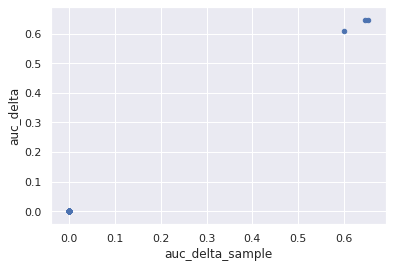

In [9]:
summary[:115].plot(x='auc_delta_sample', y='auc_delta', kind='scatter')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


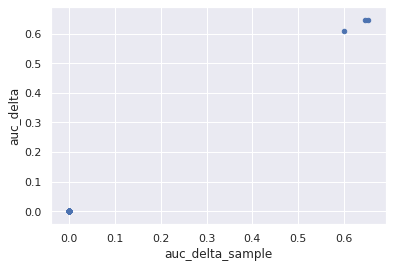

In [10]:
summary[:115].plot(x='auc_delta_sample', y='auc_delta', kind='scatter')

In [13]:
#summary.to_csv('Rank_Summary_Data.csv')

In [ ]:
#pd.read_csv('Rank_Summary_Data.csv', index_col=0)